#This jupyter notebook is prepared by “Andrew Tuazon”

In [110]:
# import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

# import the data to a dataframe and show how many rows and columns does it have
df = pd.read_csv('/content/drive/MyDrive/hrdata.csv')
df.shape


(21287, 18)

In [111]:
# call the describe method of dataframe to see some summary statistics of the numerical columns
df.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


From the statistics, we can see that the target column is a binary value, approximately 75% of the values in target are 0, since the mean is about .25 in value. In addition, the city development index and city development matrics colums have a strong correlation with each other.

In [112]:
# Show the top 5 rows and last 5 rows of the data frame
df.head()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [113]:
# Show the top 5 rows and last 5 rows of the data frame
df.tail()

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


In [114]:
# List all the numerical columns
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

In [115]:
# List all the categorial columns
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

In [116]:
13.# Show a list with column wise count of missing values and display the list in count wise descending order
nulls = df.isnull().sum().to_frame('nulls') #sum up nulls and make a df
nulls.sort_values("nulls", inplace = True, ascending = False) #sort it by descending order
for index, row in nulls.iterrows(): #print it in well formatted way
  print(index, row[0])

company_type 6774
company_size 6560
gender 5016
major_discipline 3125
target 2129
education_level 512
last_new_job 463
enrolled_university 417
experience 70
state 0
training_hours 0
Unnamed: 0 0
rec_num 0
relevent_experience 0
city_development_index 0
city 0
enrollee_id 0
city_development_matrics 0


In [117]:
# Show a list with column wise percentage of missing values and display the list in percentage wise descending order
percentage = df.isnull().mean()*100
percentage = percentage.to_frame("nulls")
percentage.sort_values("nulls", inplace = True, ascending = False)
for index, row in percentage.iterrows():
  print(index, row[0])

company_type 31.822238925165593
company_size 30.816930520975244
gender 23.563677361770093
major_discipline 14.680321322873116
target 10.001409310846995
education_level 2.405223845539531
last_new_job 2.1750364071968806
enrolled_university 1.9589420773241883
experience 0.3288391976323578
state 0.0
training_hours 0.0
Unnamed: 0 0.0
rec_num 0.0
relevent_experience 0.0
city_development_index 0.0
city 0.0
enrollee_id 0.0
city_development_matrics 0.0


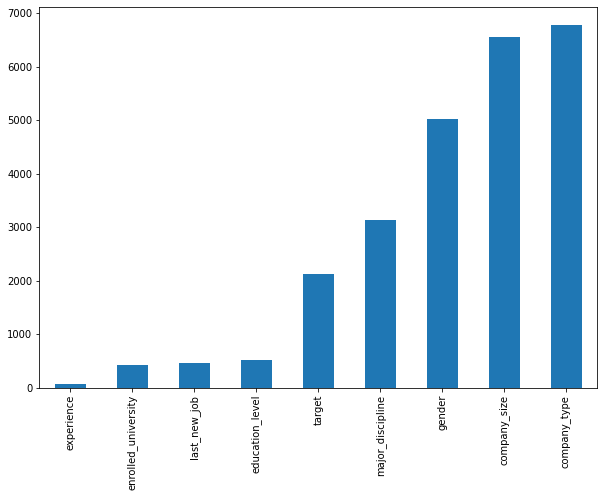

In [118]:
# Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot
missing = df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace = True)
plt.figure(figsize = (10, 7))
missing.plot.bar()

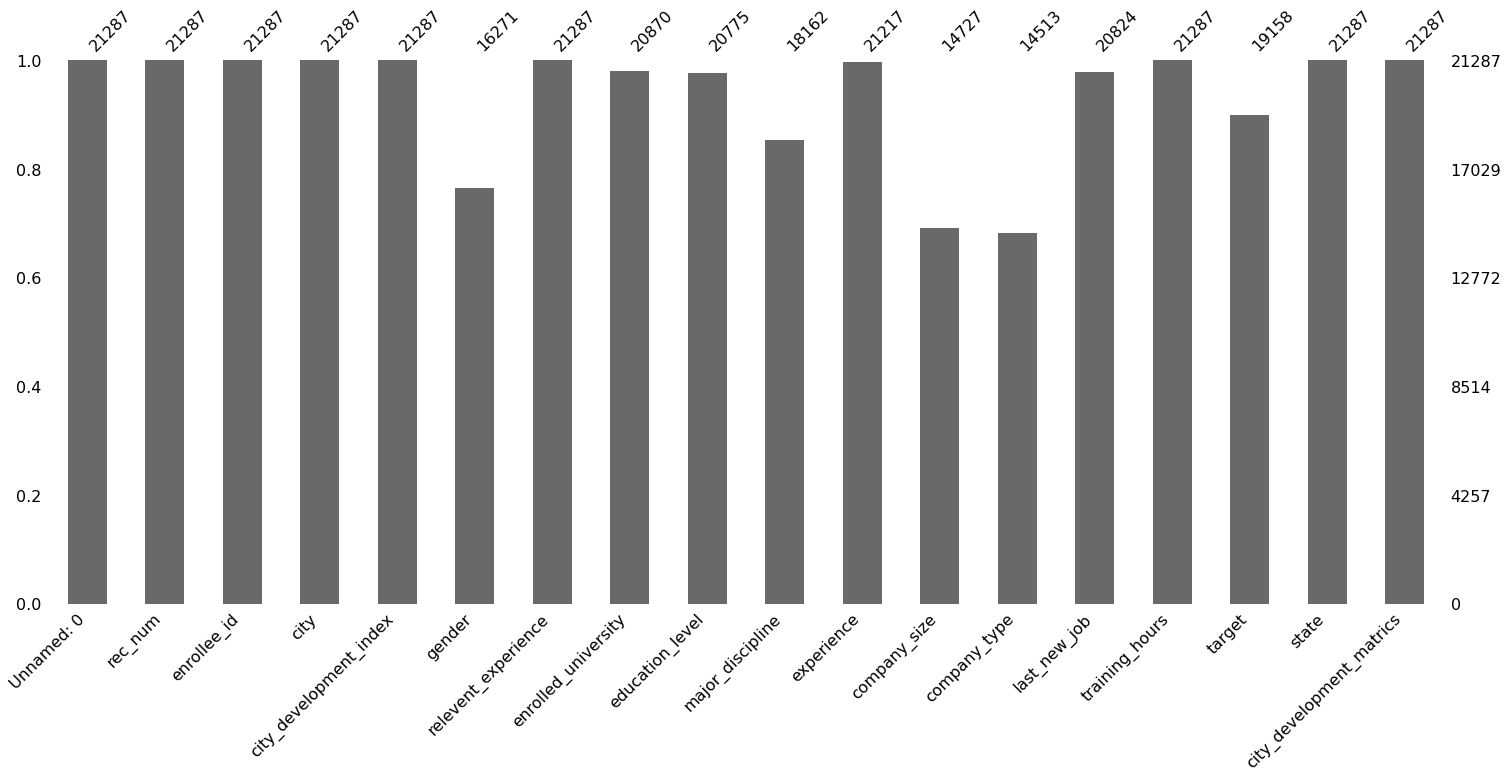

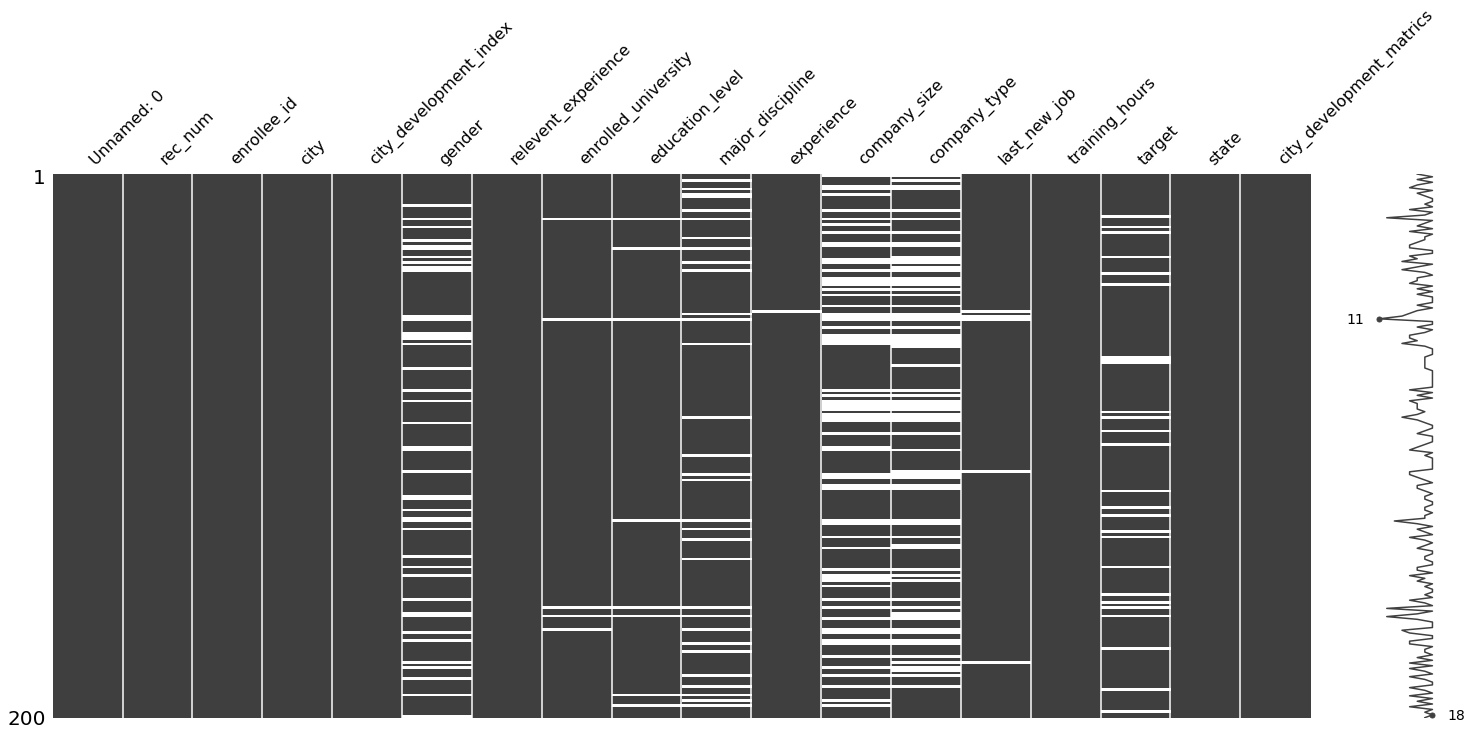

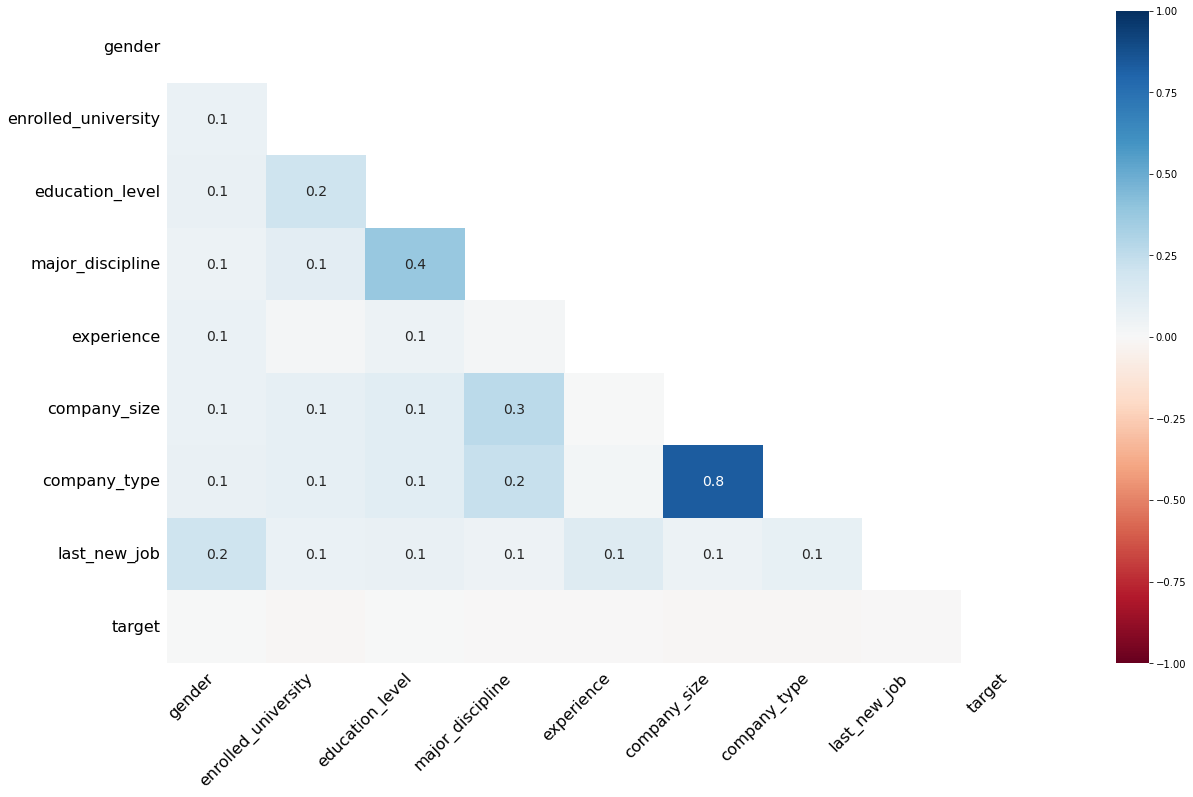

In [119]:
# Use missingno’s bar plot, matrix plot with 200 sample, and heatmap
msno.bar(df)
msno.matrix(df.sample(200))
msno.heatmap(df)

In the heatmap, we can see that the presence of null values in the company_size category is positively correlated with the presence of null values in company_type. In addition, we can see that the gender, company_size, and company_type columns have significant amounts of missing values.

[Text(0.5, 1.0, 'State Value Counts')]

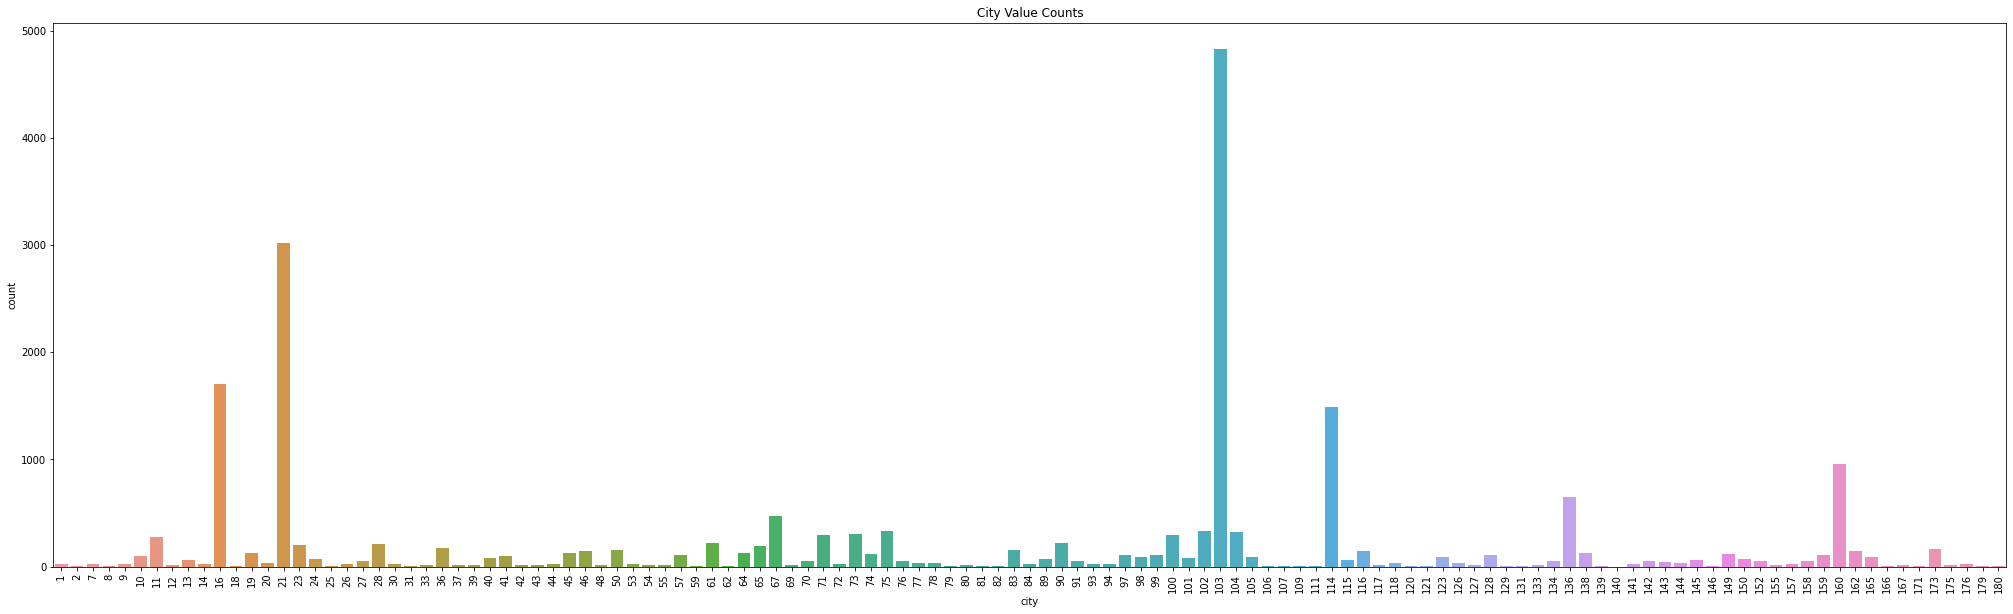

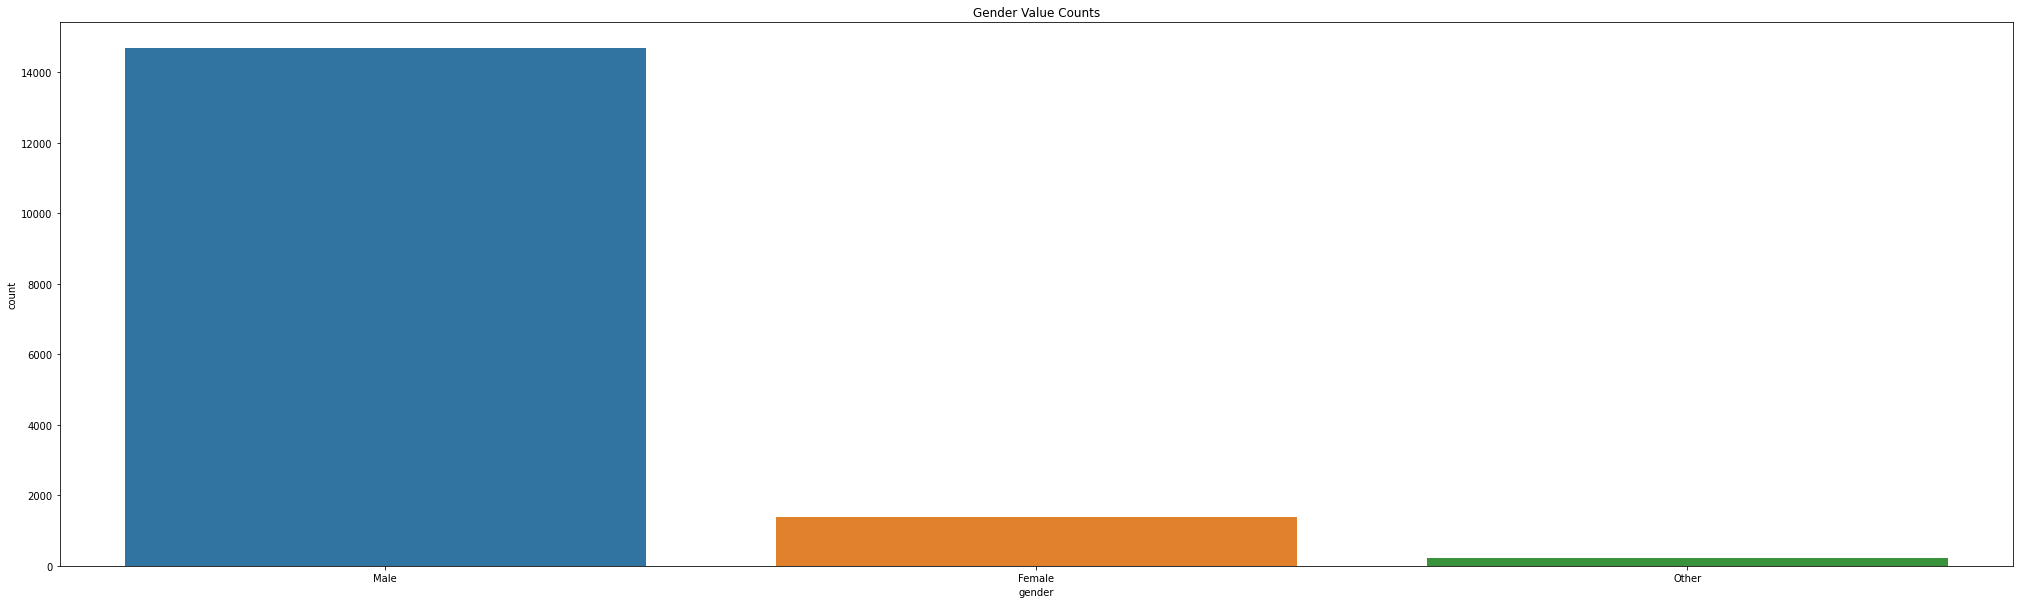

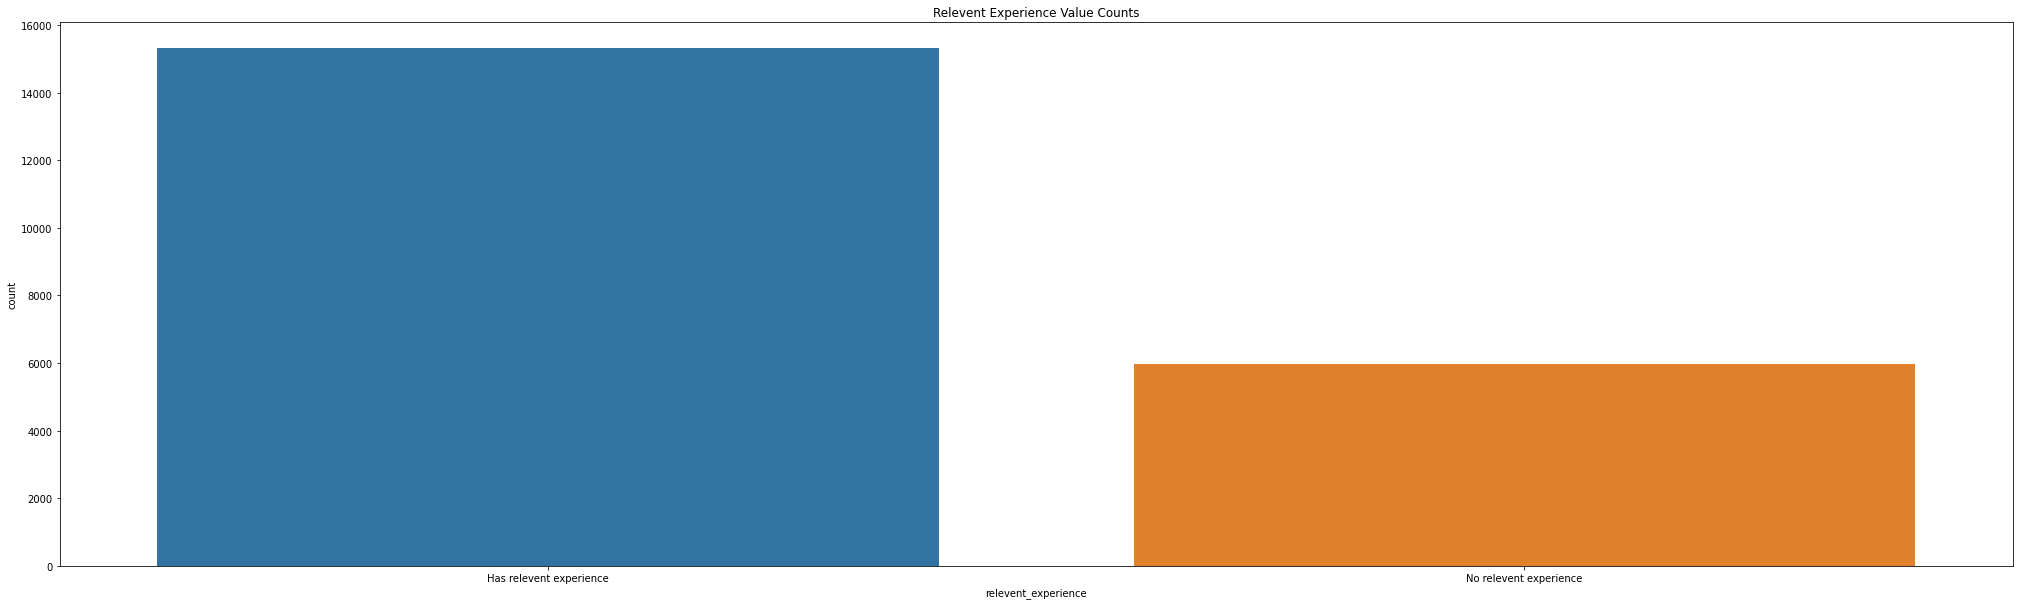

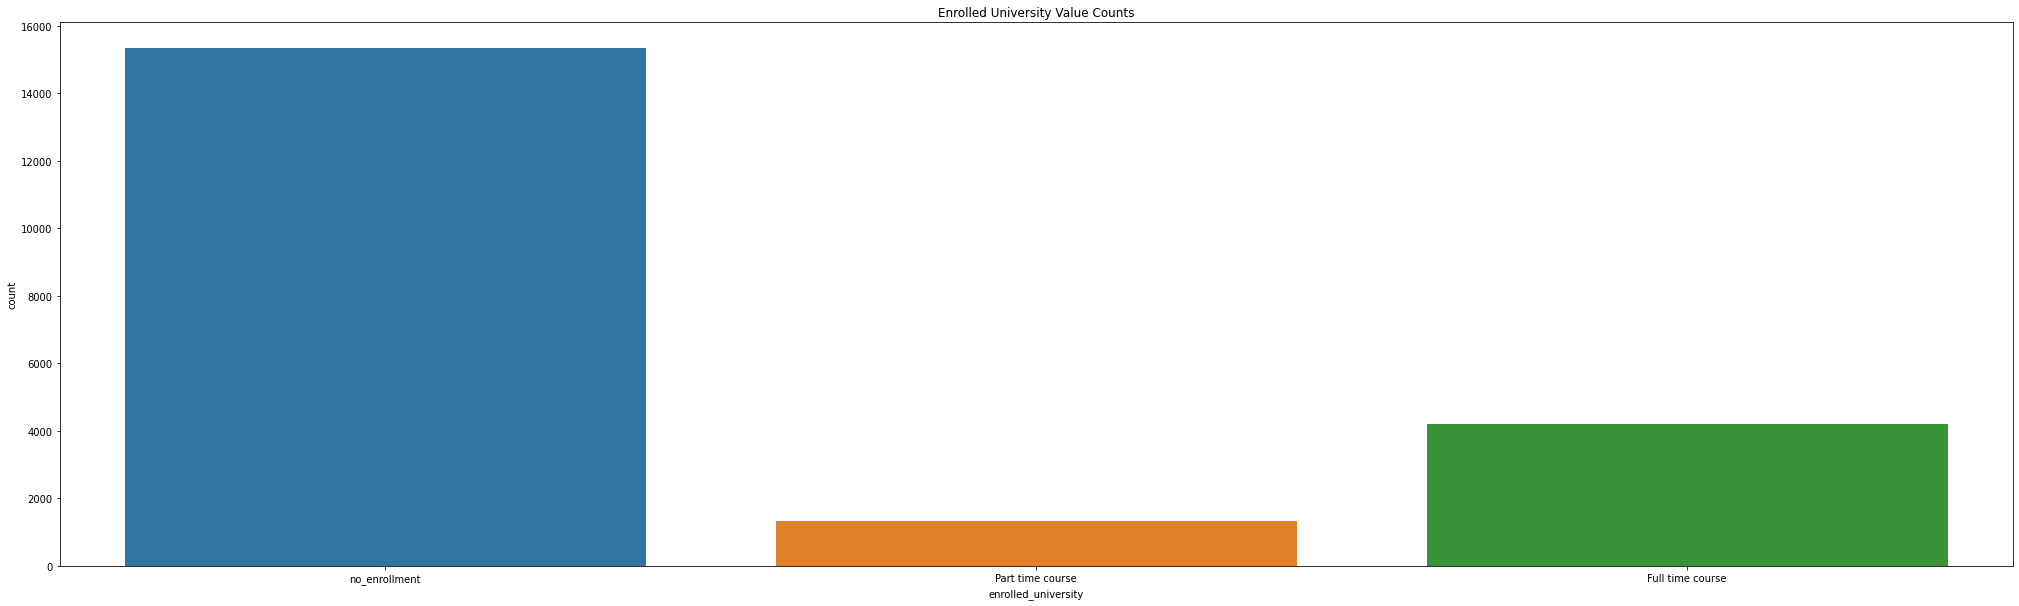

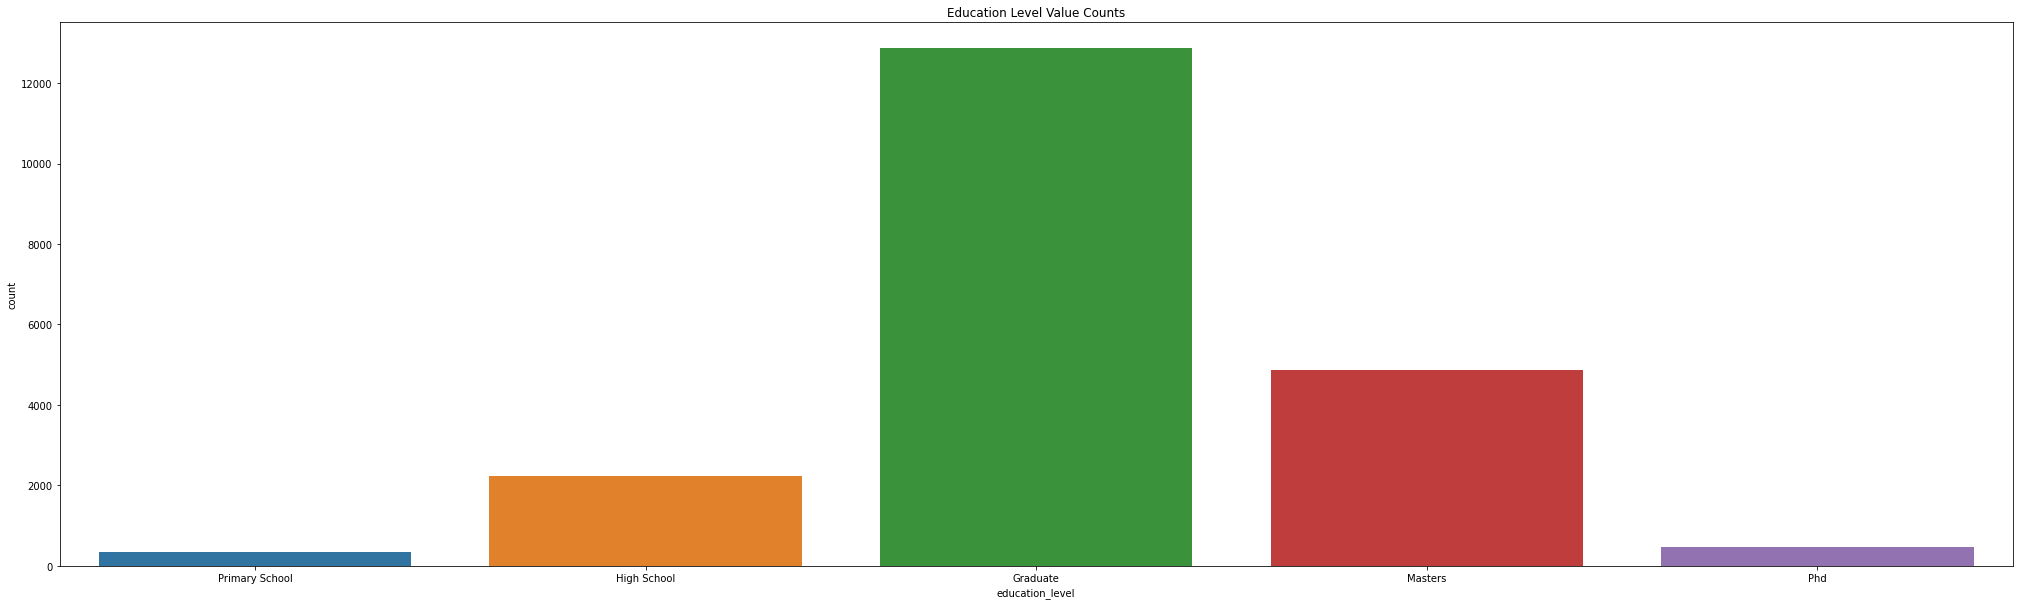

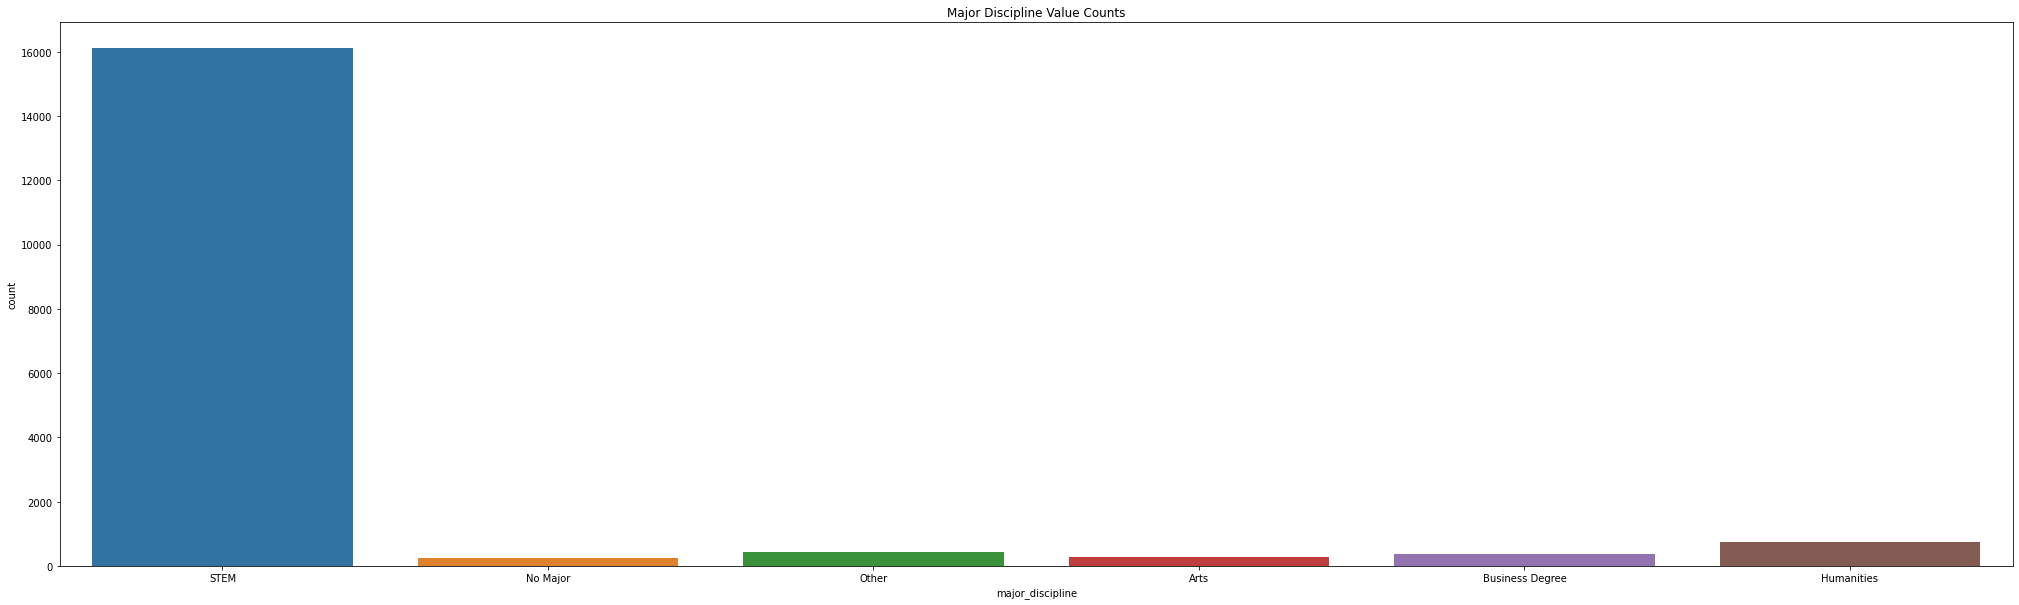

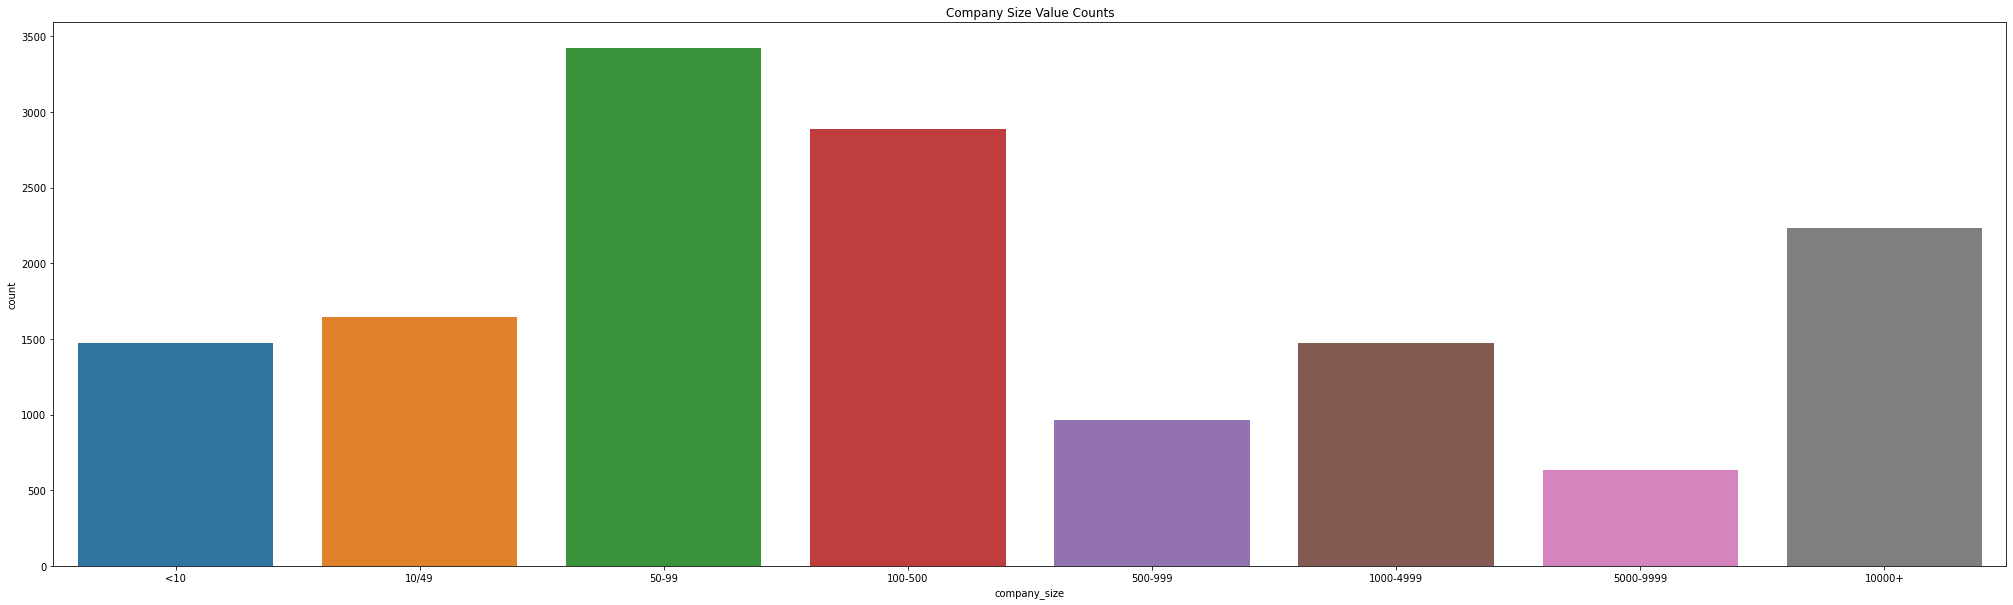

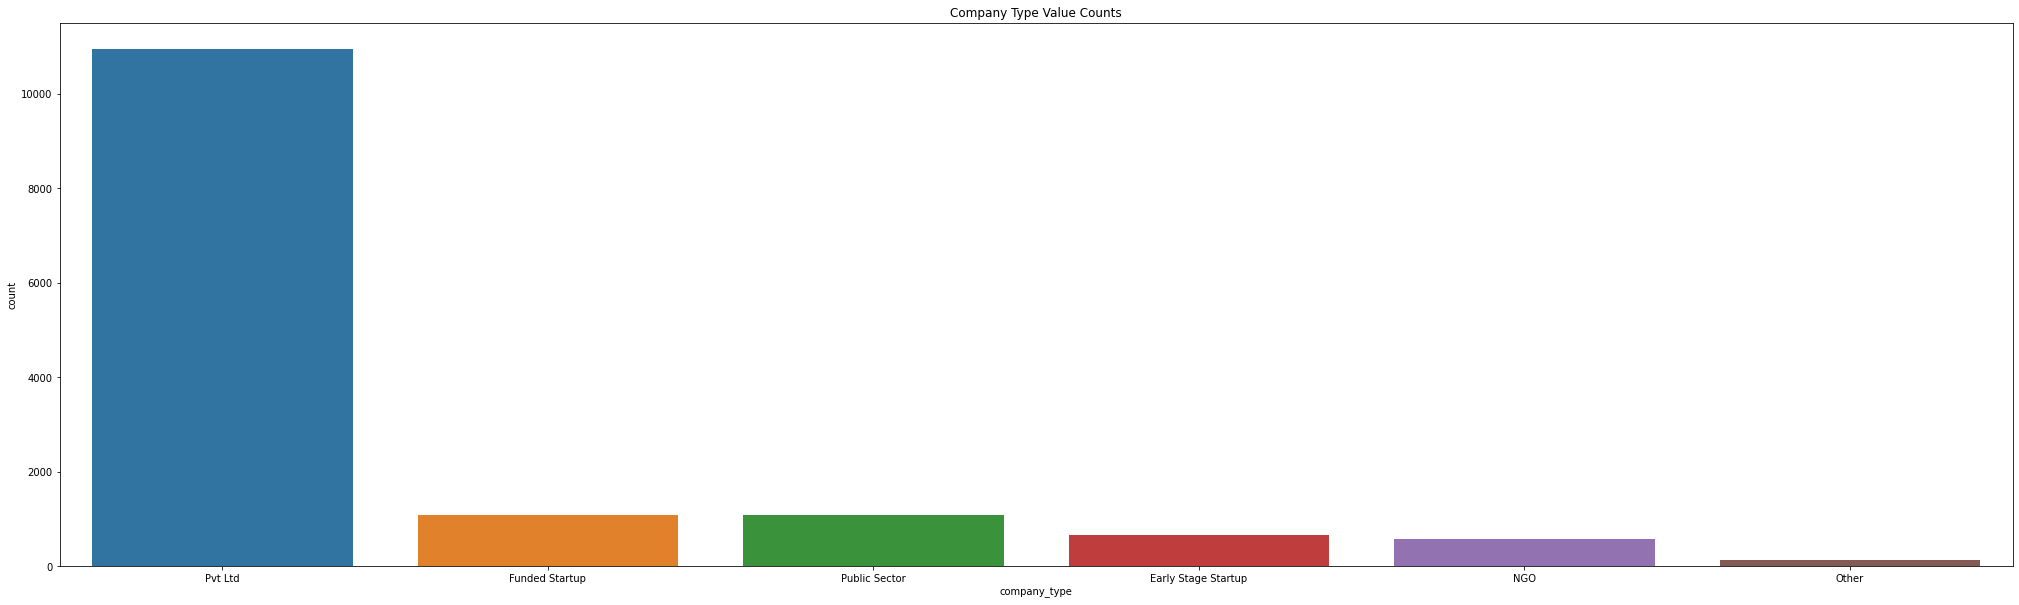

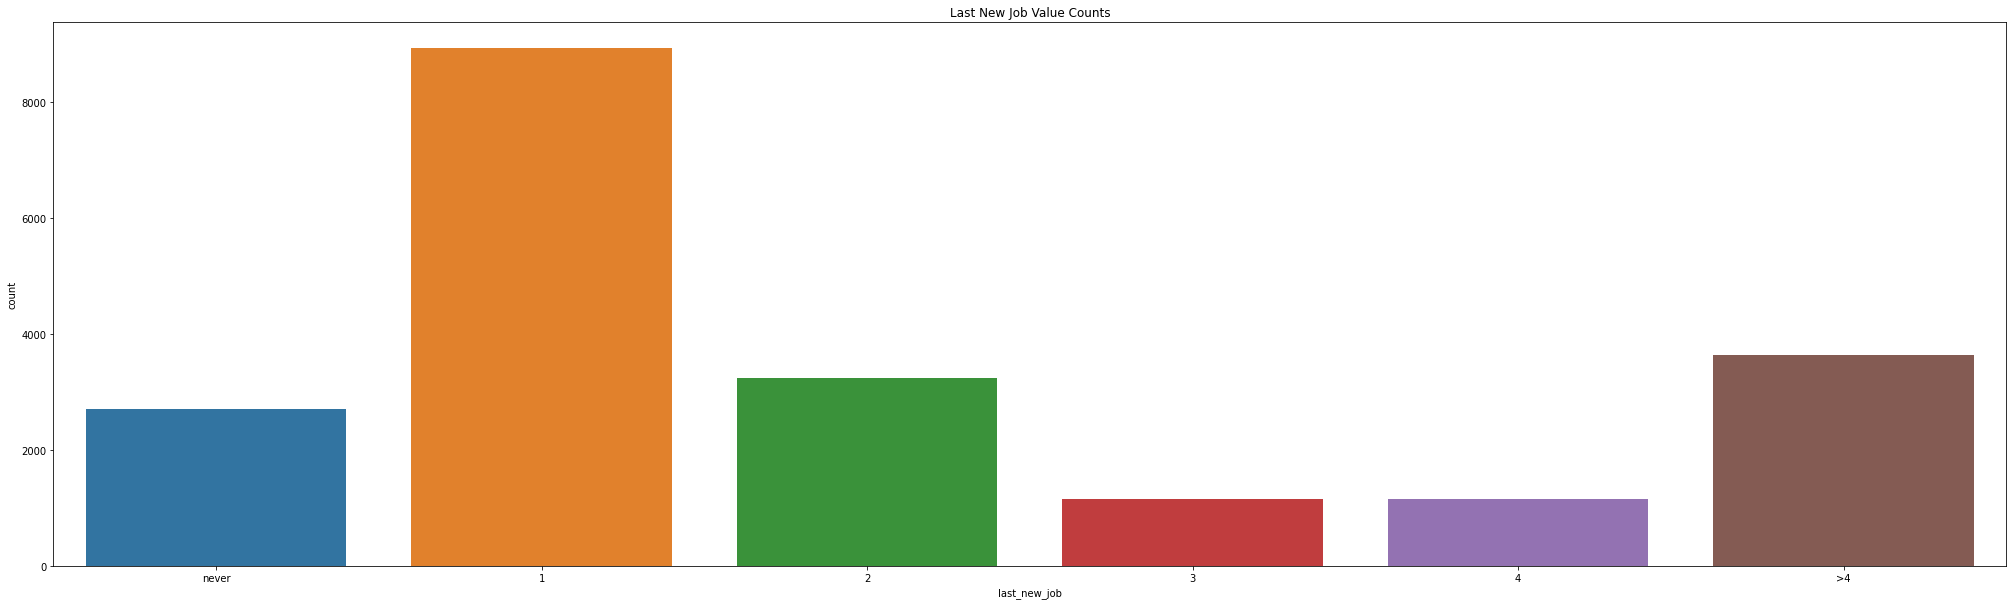

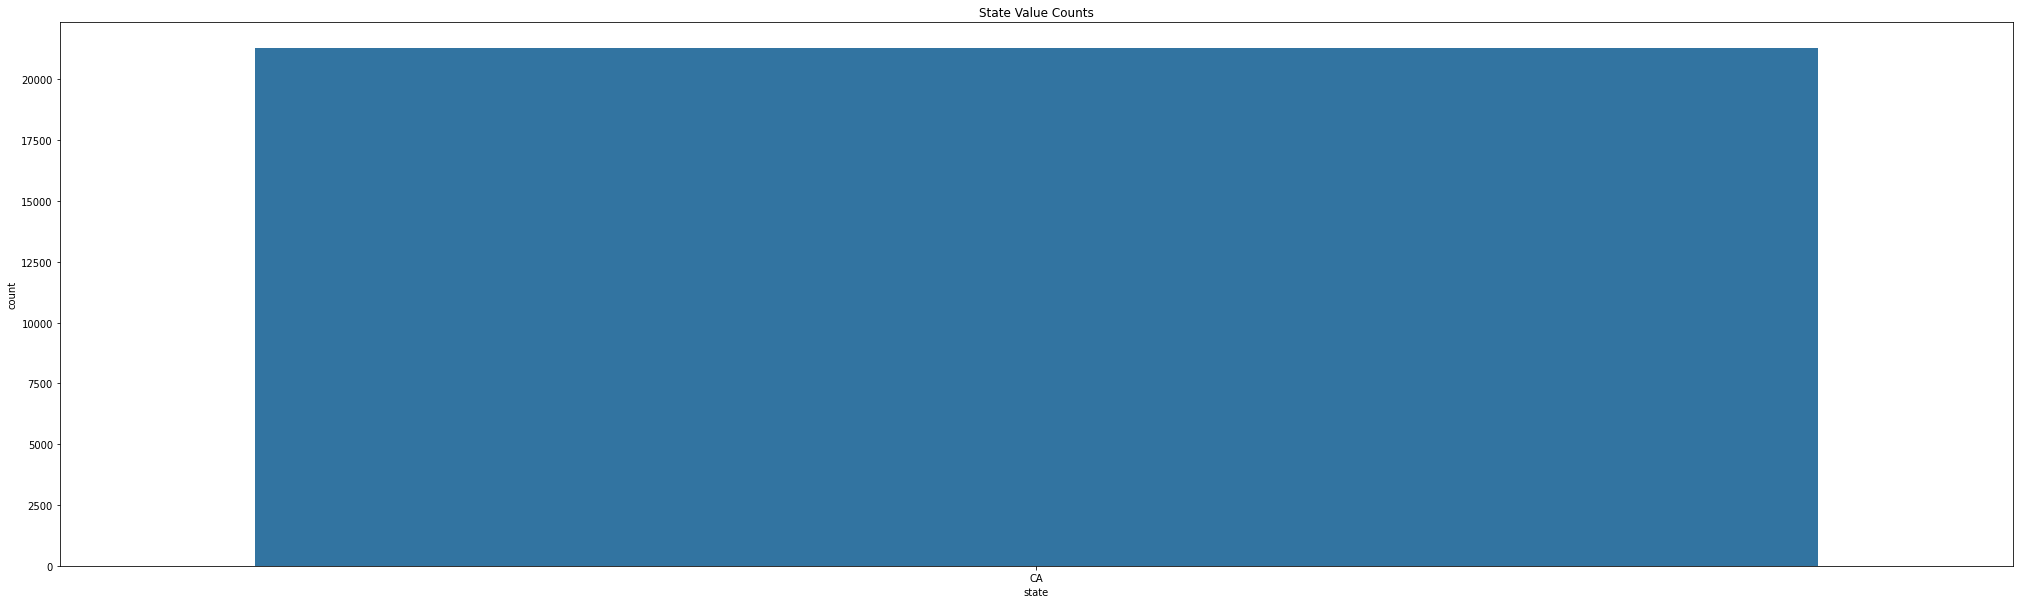

In [120]:
# Use seaborn bar plot for the city feature to see different values and count              
df['city'] = df['city'].str.replace('city_','').astype(float)
df.sort_values(by='city', inplace=True)
df['city'] = df['city'].astype(int)
plt.figure(figsize = (35,10))
sns.countplot(x = 'city', data = df).set(title='City Value Counts')
plt.xticks(rotation = 90)

plt.figure(figsize = (35,10))
sns.countplot(x = 'gender', data = df).set(title='Gender Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'relevent_experience', data = df).set(title='Relevent Experience Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'enrolled_university', data = df, order=['no_enrollment', 'Part time course', 'Full time course']).set(title='Enrolled University Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'education_level', data = df, order=['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']).set(title='Education Level Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'major_discipline', data = df).set(title='Major Discipline Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'company_size', data = df, order=['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']).set(title='Company Size Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'company_type', data = df).set(title='Company Type Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'last_new_job', data = df, order=['never', '1', '2', '3', '4', '>4']).set(title='Last New Job Value Counts')

plt.figure(figsize = (35,10))
sns.countplot(x = 'state', data = df).set(title='State Value Counts')

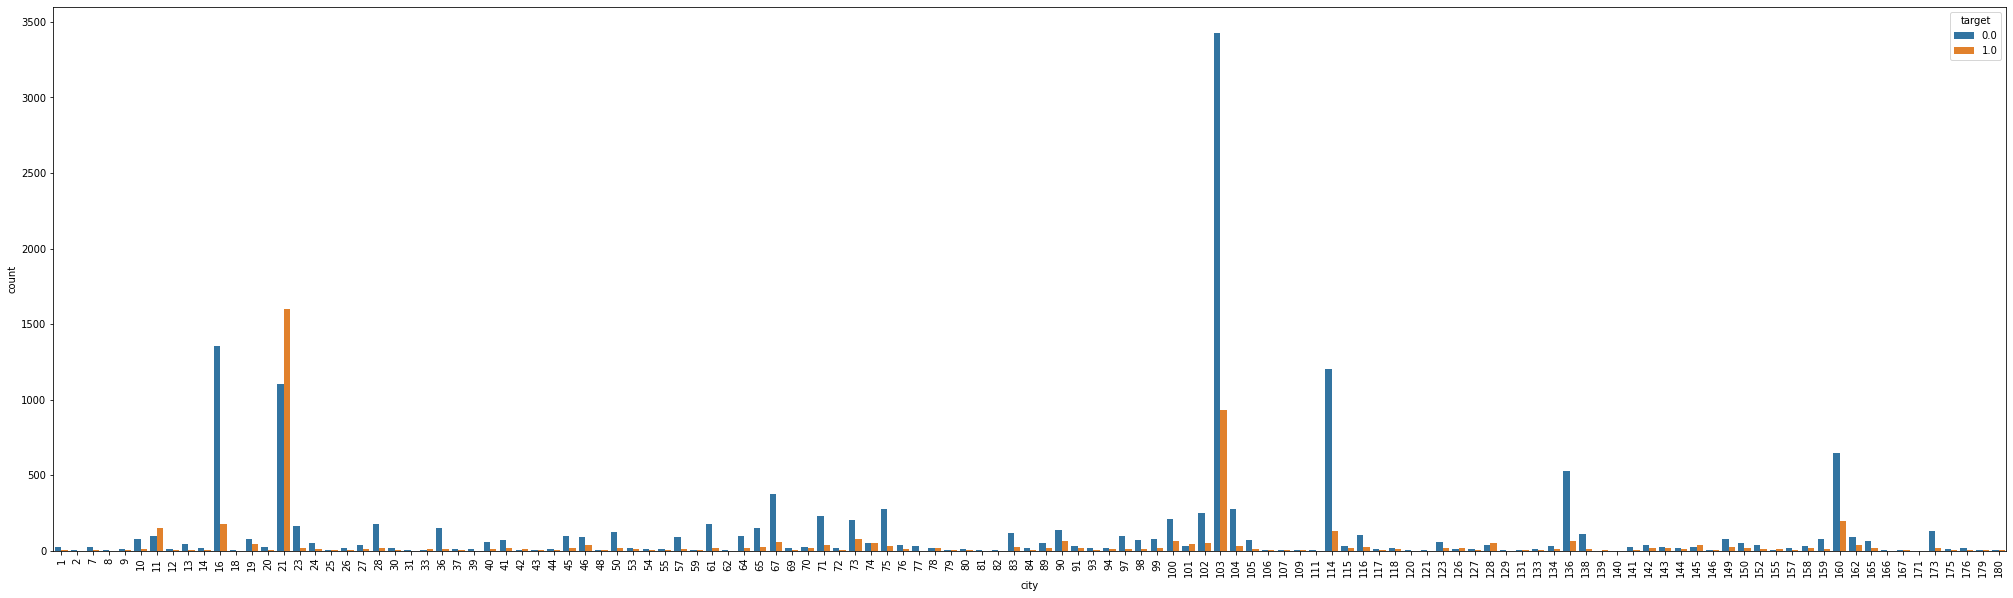

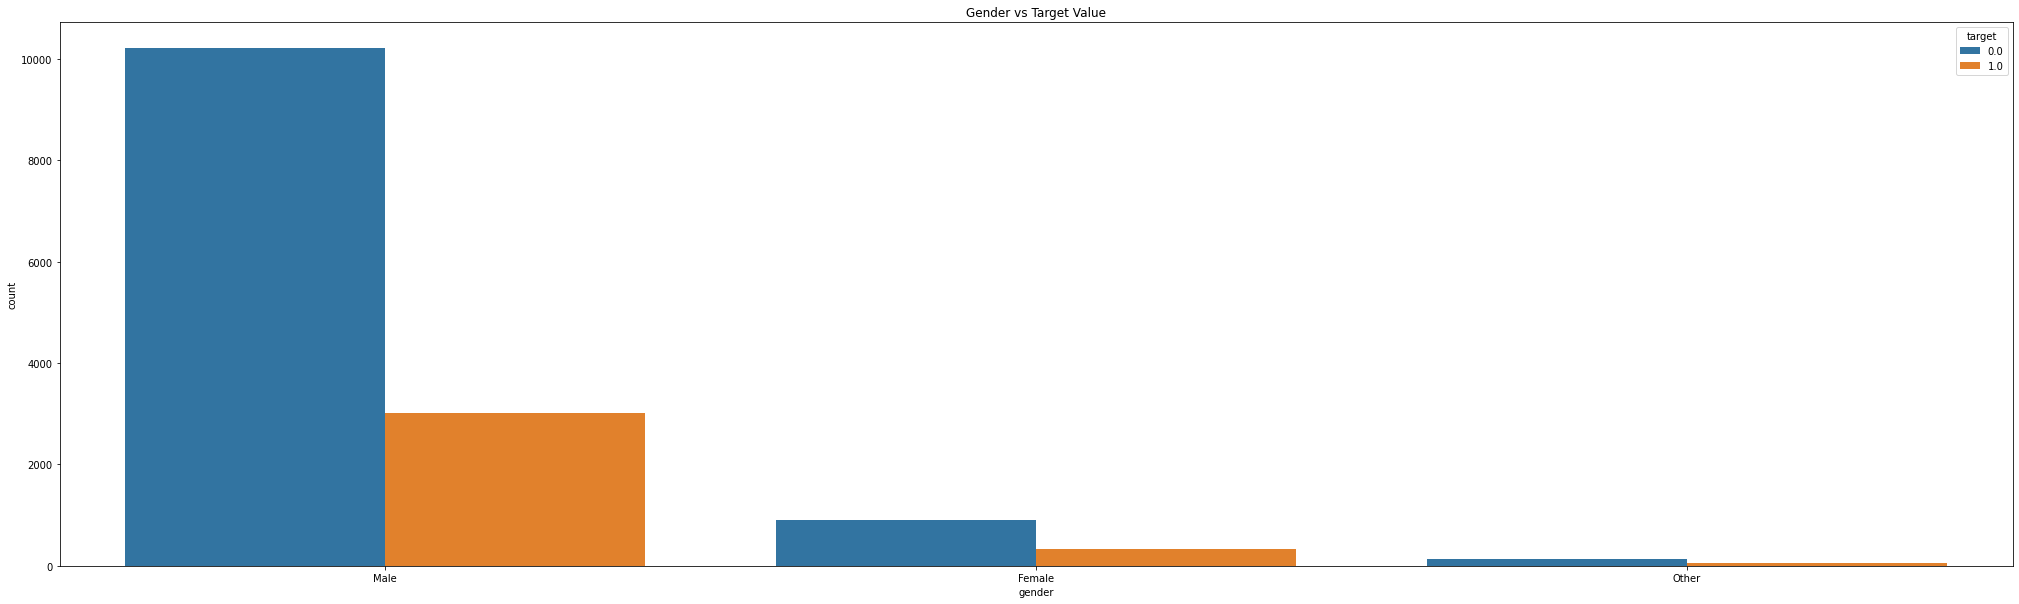

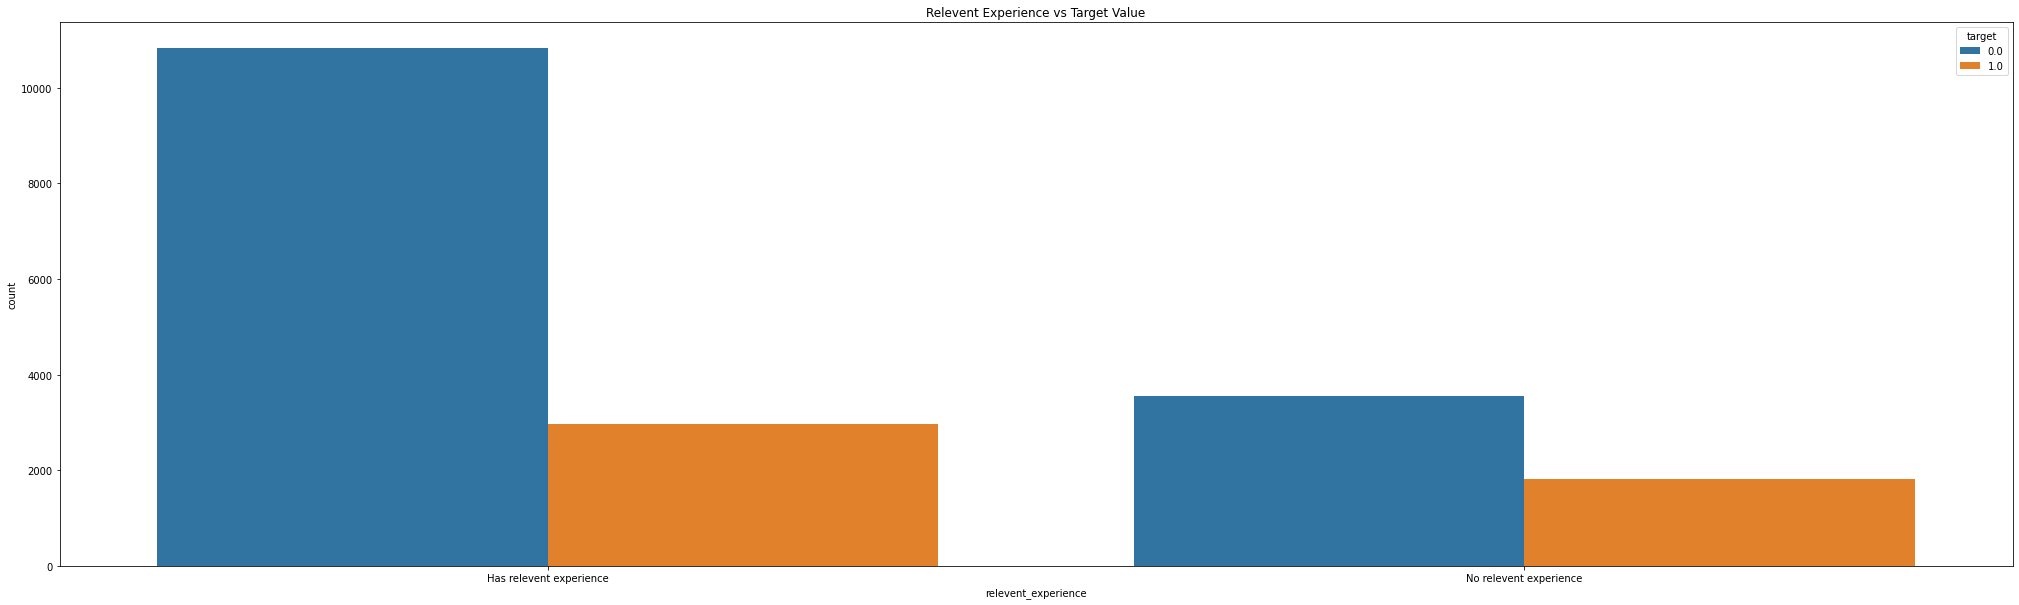

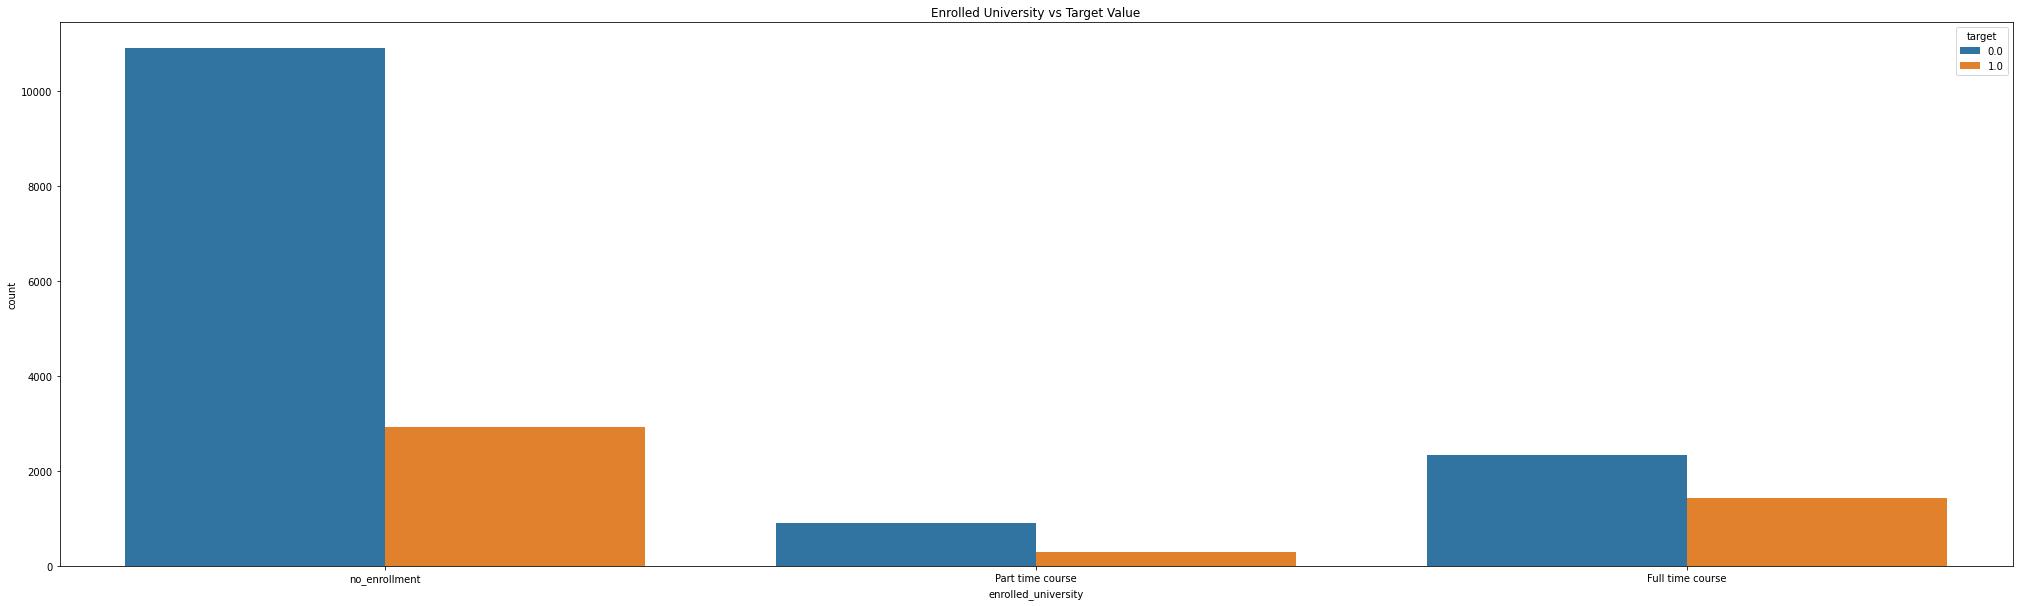

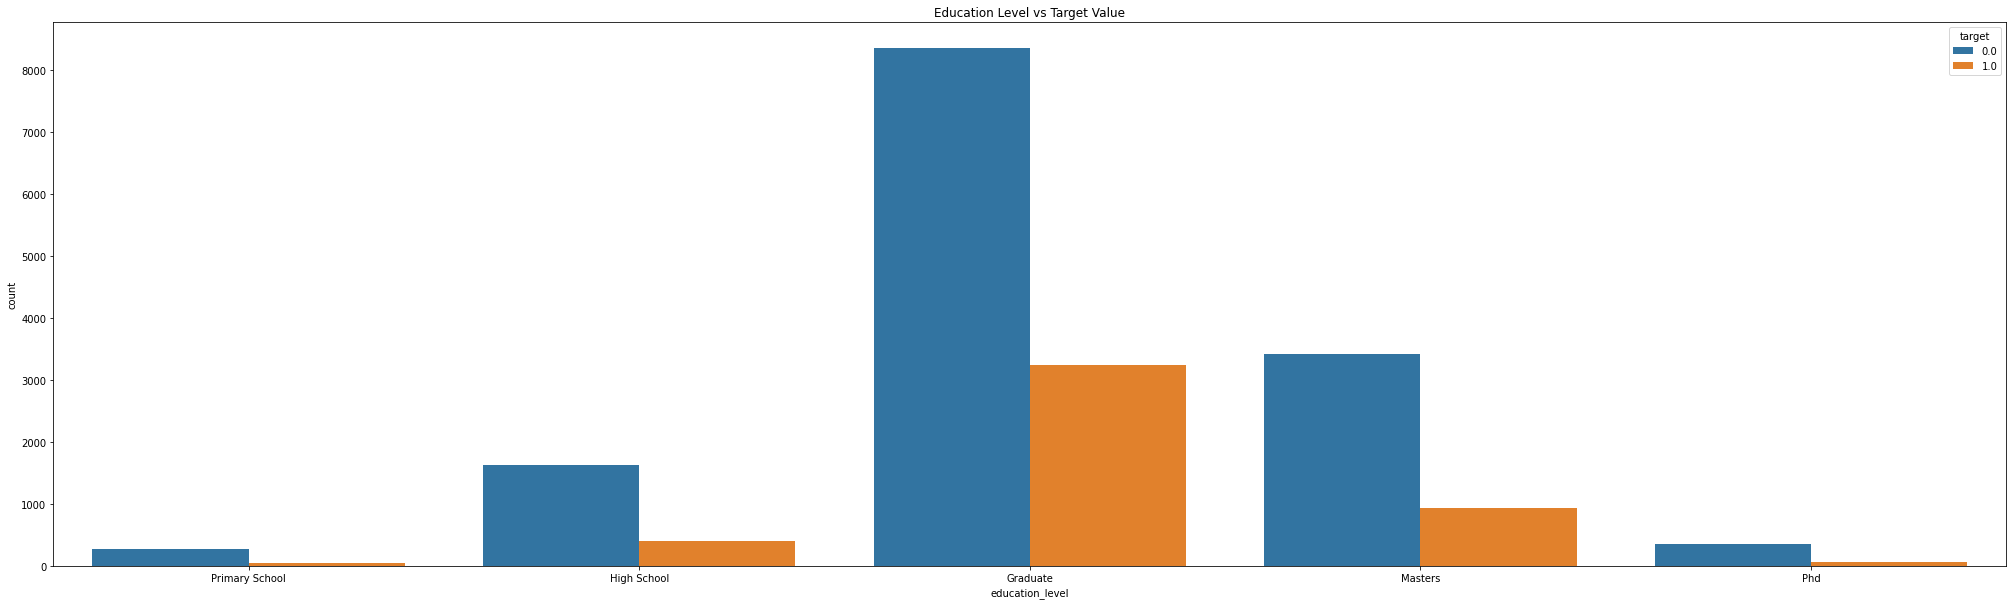

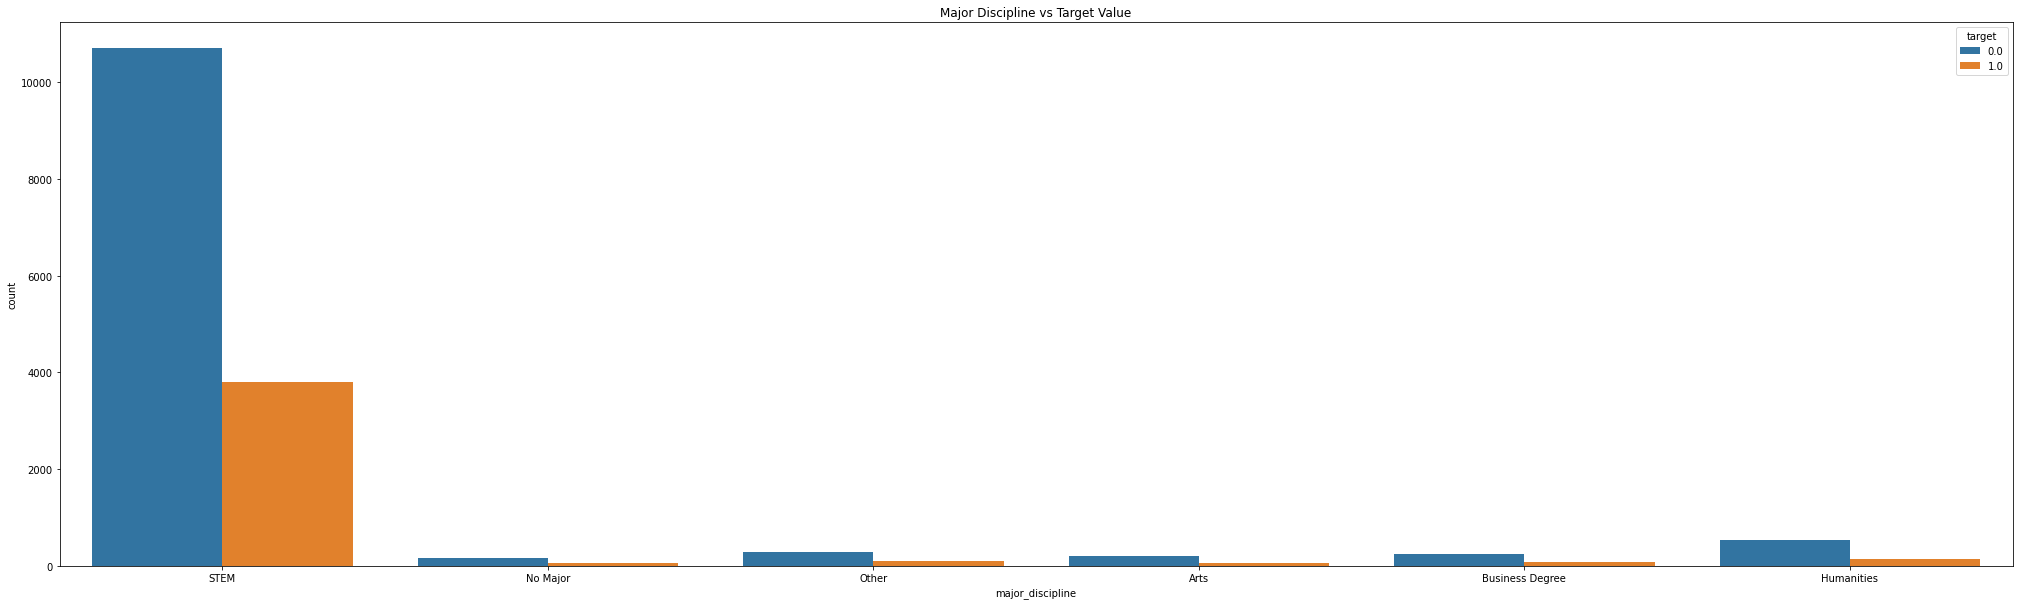

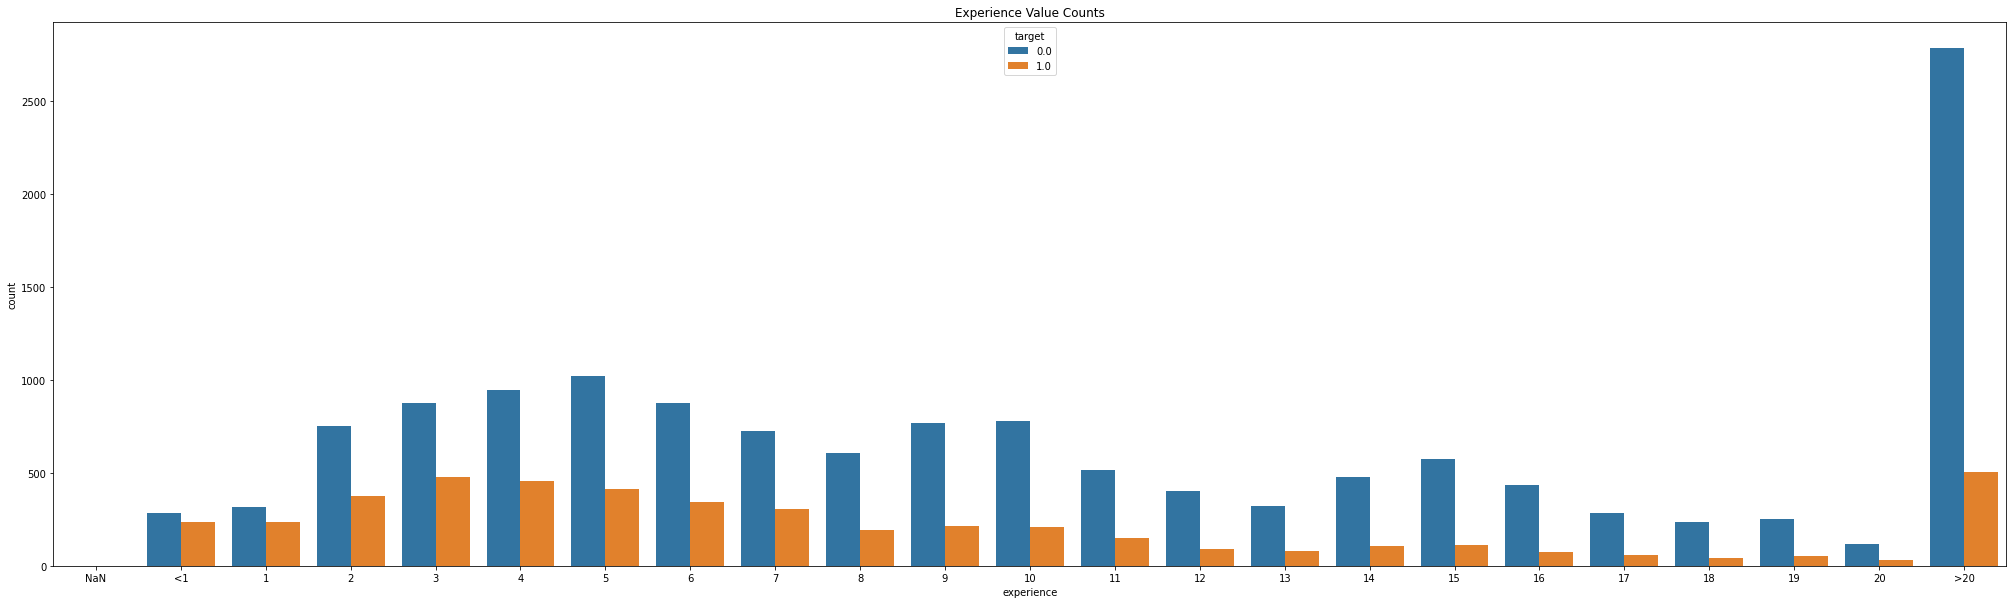

[Text(0.5, 1.0, 'State vs Target Value')]

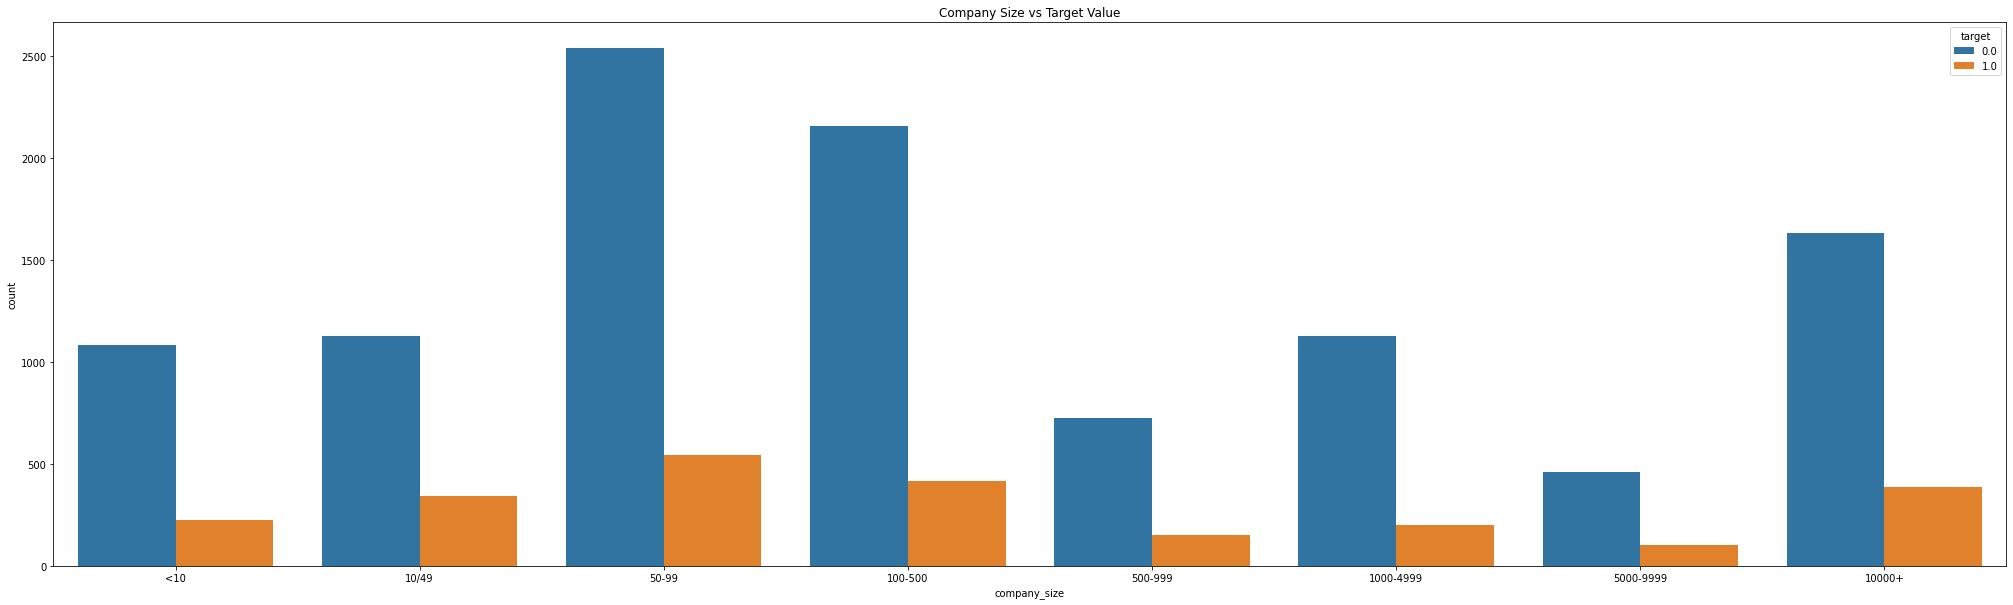

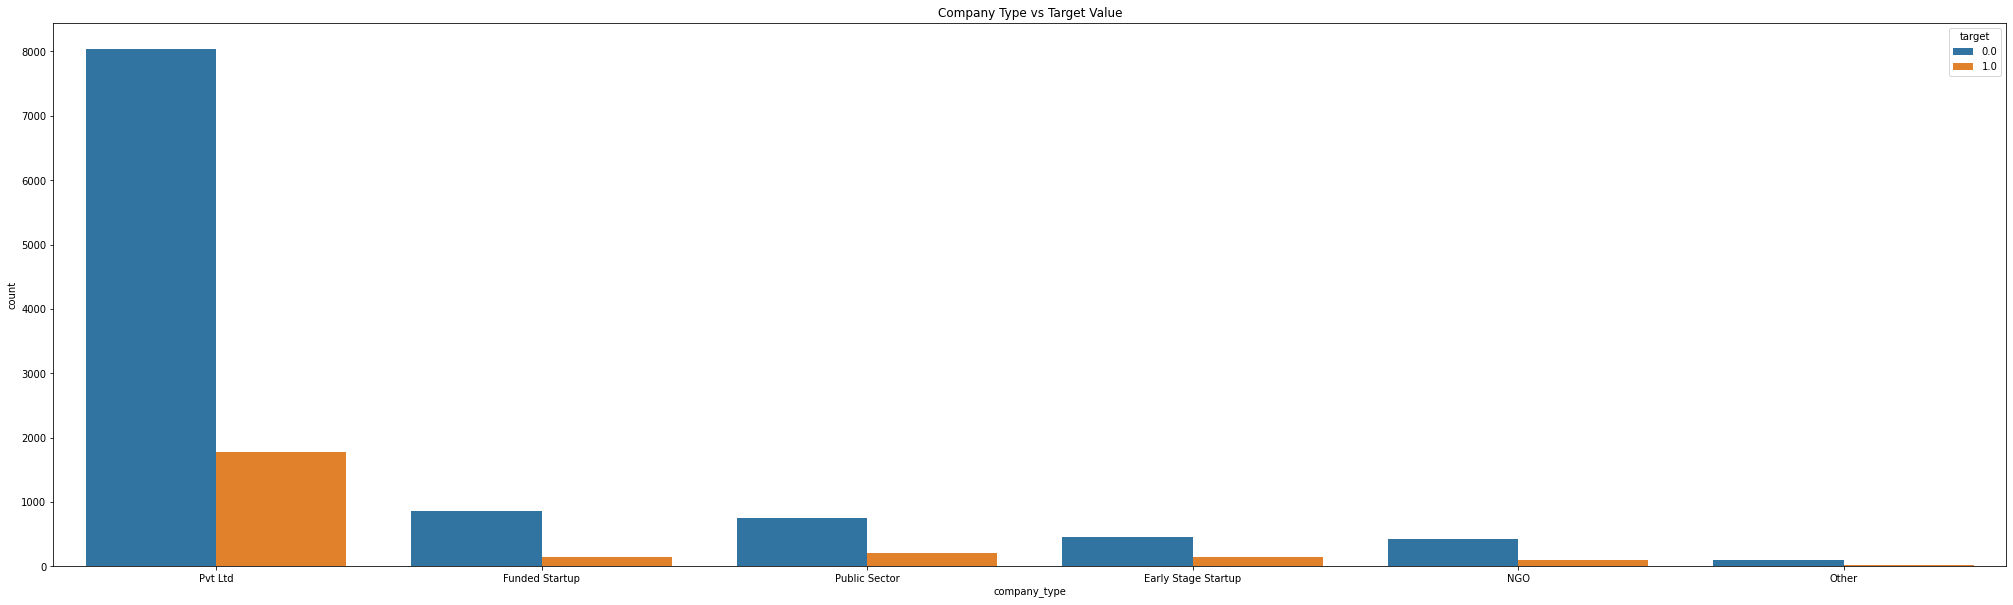

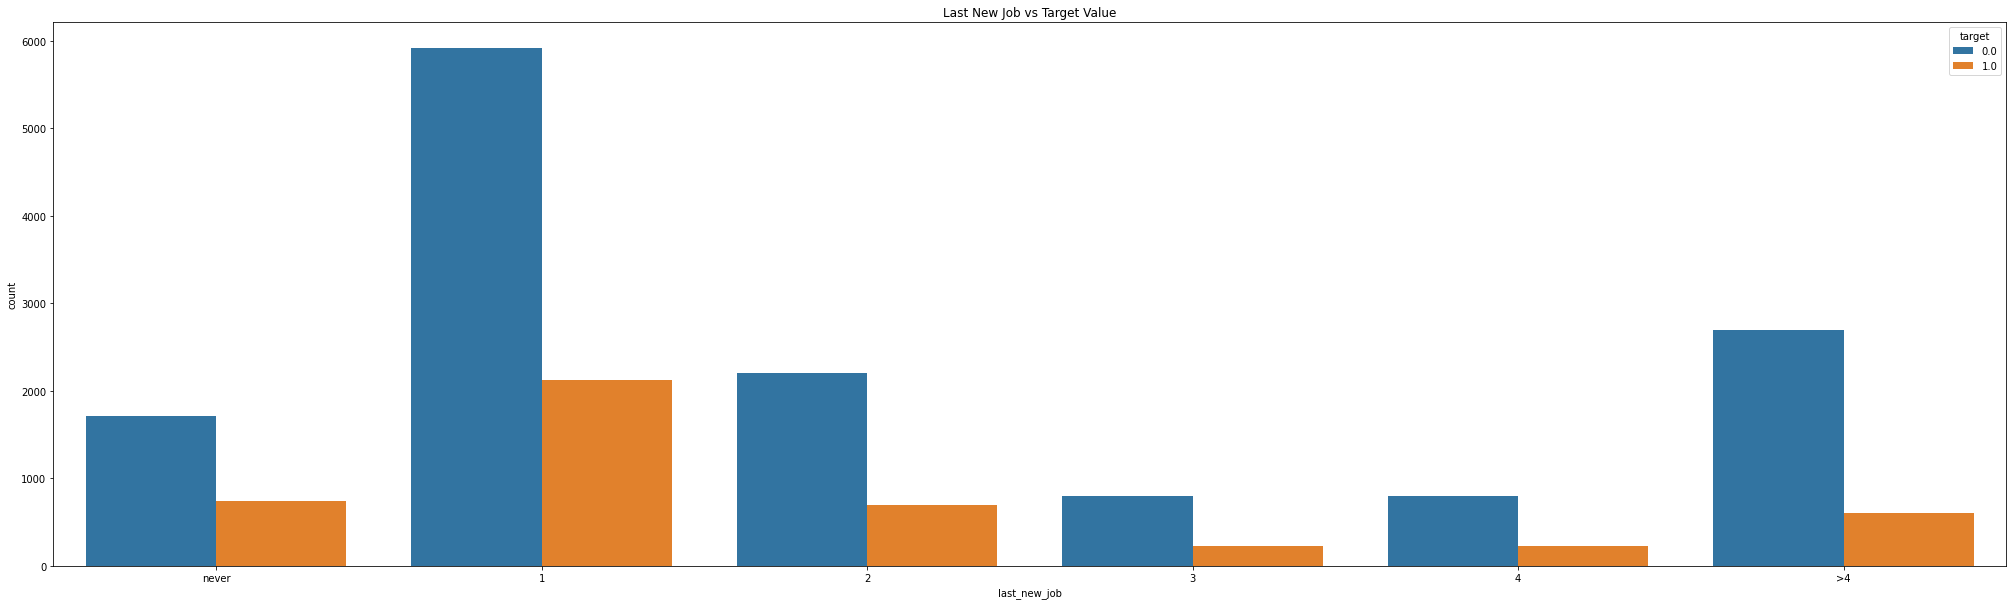

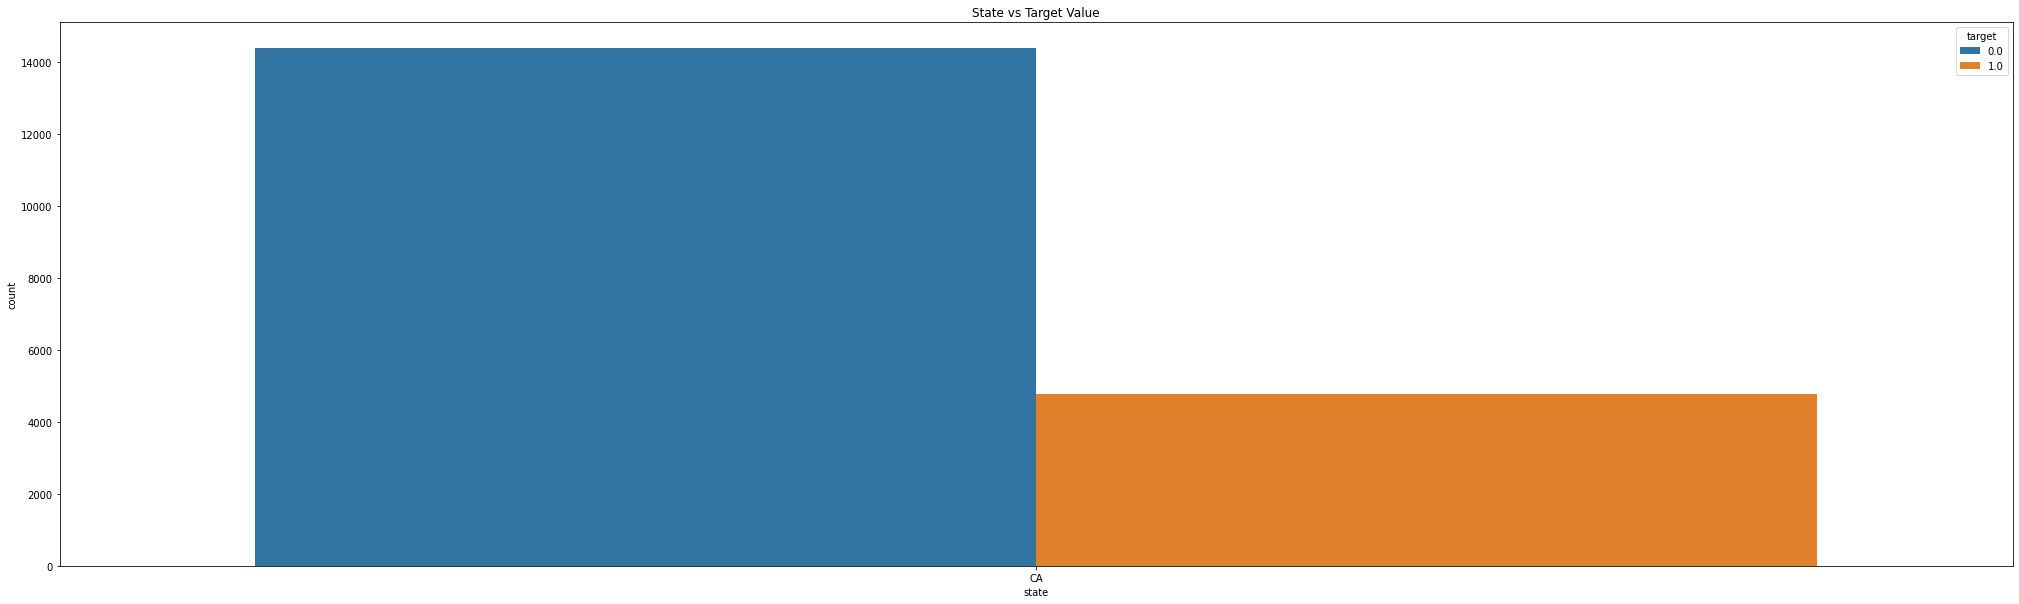

In [121]:
# Use seaborn countplot for the city feature against the values of the target
plt.figure(figsize = (35,10))
sns.countplot(x = 'city', hue = 'target', data = df)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'gender', hue = 'target', data = df).set(title='Gender vs Target Value')
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'relevent_experience', hue = 'target', data = df).set(title='Relevent Experience vs Target Value')
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'enrolled_university', hue = 'target', data = df, order=['no_enrollment', 'Part time course', 'Full time course']).set(title='Enrolled University vs Target Value')
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'education_level', hue = 'target', data = df, order=['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']).set(title='Education Level vs Target Value')
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'major_discipline', hue = 'target', data = df).set(title='Major Discipline vs Target Value')
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'experience',hue = 'target', data = df, order = ["NaN", "<1","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18",'19', '20', '>20']).set(title='Experience Value Counts')
plt.show()

plt.figure(figsize = (35,10))
sns.countplot(x = 'company_size', hue = 'target', data = df, order=['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']).set(title='Company Size vs Target Value')

plt.figure(figsize = (35,10))
sns.countplot(x = 'company_type', hue = 'target', data = df).set(title='Company Type vs Target Value')

plt.figure(figsize = (35,10))
sns.countplot(x = 'last_new_job', hue = 'target', data = df, order=['never', '1', '2', '3', '4', '>4']).set(title='Last New Job vs Target Value')

plt.figure(figsize = (35,10))
sns.countplot(x = 'state', hue = 'target', data = df).set(title='State vs Target Value')

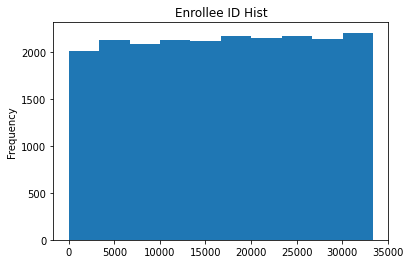

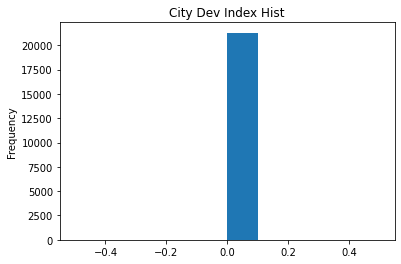

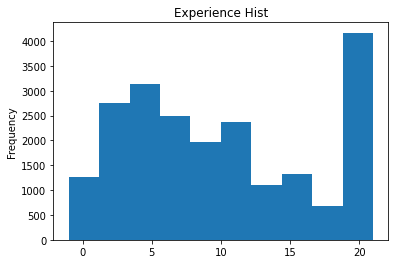

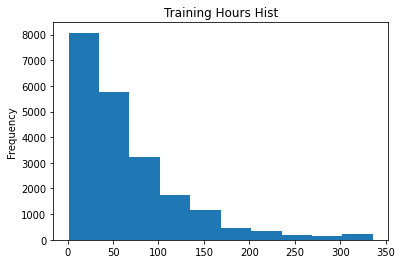

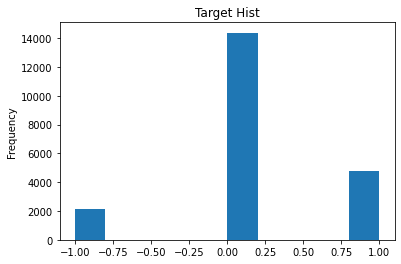

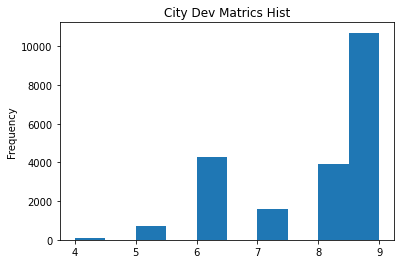

In [122]:
# For each numerical features, perform the following: Plot their distributions using histogram
df['enrollee_id'].astype(int).plot.hist().set(title='Enrollee ID Hist')
plt.show()
df['city_development_index'].astype(int).plot.hist().set(title='City Dev Index Hist')
plt.show()
df['experience'] = df['experience'].fillna('-1')
df['experience'] = df['experience'].str.replace('<1','0').str.replace('>20','21')
df['experience'].astype(int).plot.hist().set(title='Experience Hist')
plt.show()
df['training_hours'].astype(int).plot.hist().set(title='Training Hours Hist')
plt.show()
df['target'] = df['target'].fillna('-1')
df['target'].astype(int).plot.hist().set(title='Target Hist')
plt.show()
df['city_development_matrics'].astype(int).plot.hist().set(title='City Dev Matrics Hist')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

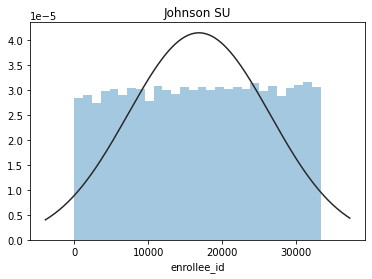

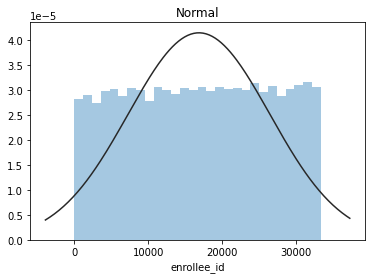

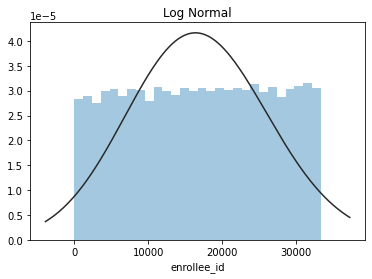

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

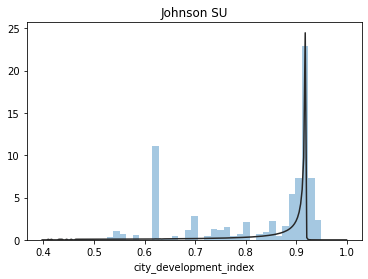

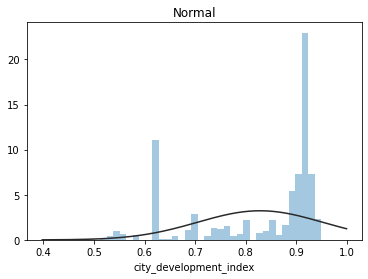

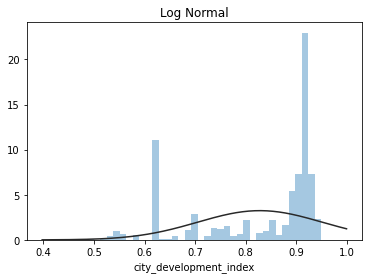

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

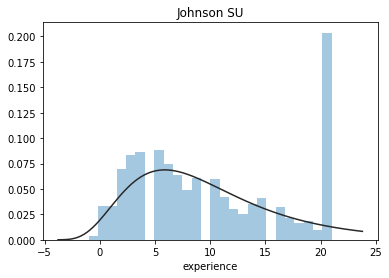

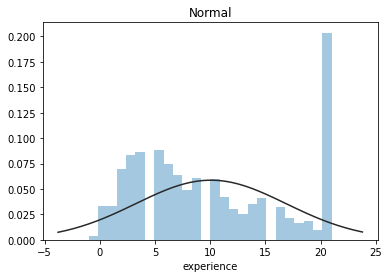

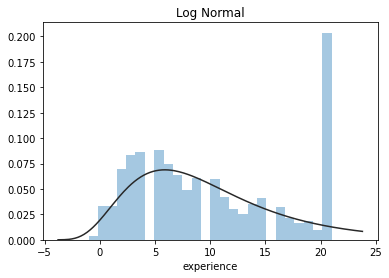

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

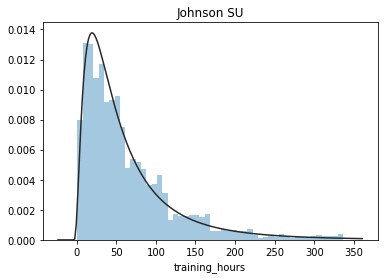

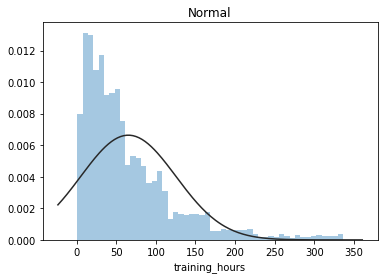

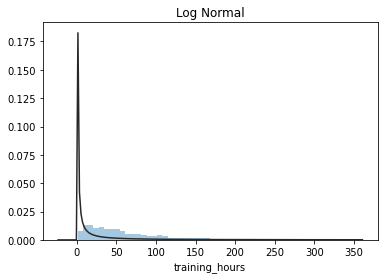

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

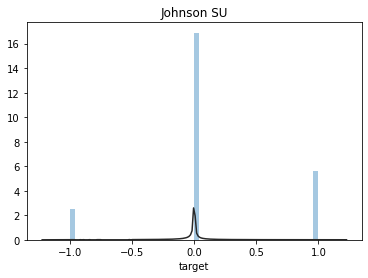

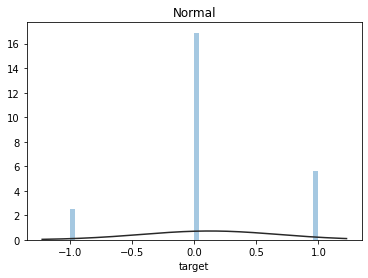

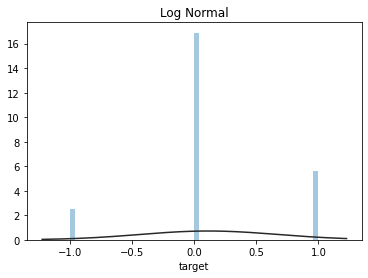

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

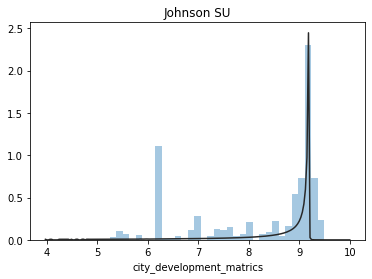

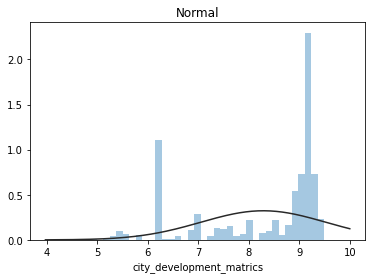

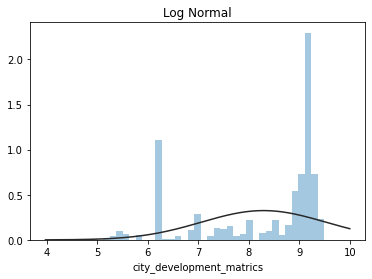

In [123]:
#Plot the distribution using seaborn distplot
y = df['enrollee_id']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

y = df['city_development_index']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

y = df['experience']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

y = df['training_hours']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

y = df['target']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

y = df['city_development_matrics']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
plt.show()

target                      1.000000
enrollee_id                 0.049475
Unnamed: 0                 -0.000077
rec_num                    -0.000077
training_hours             -0.021577
city_development_matrics   -0.341665
city_development_index     -0.341665
Name: target, dtype: float64
Index(['target', 'enrollee_id', 'Unnamed: 0', 'rec_num', 'training_hours',
       'city_development_matrics', 'city_development_index'],
      dtype='object')


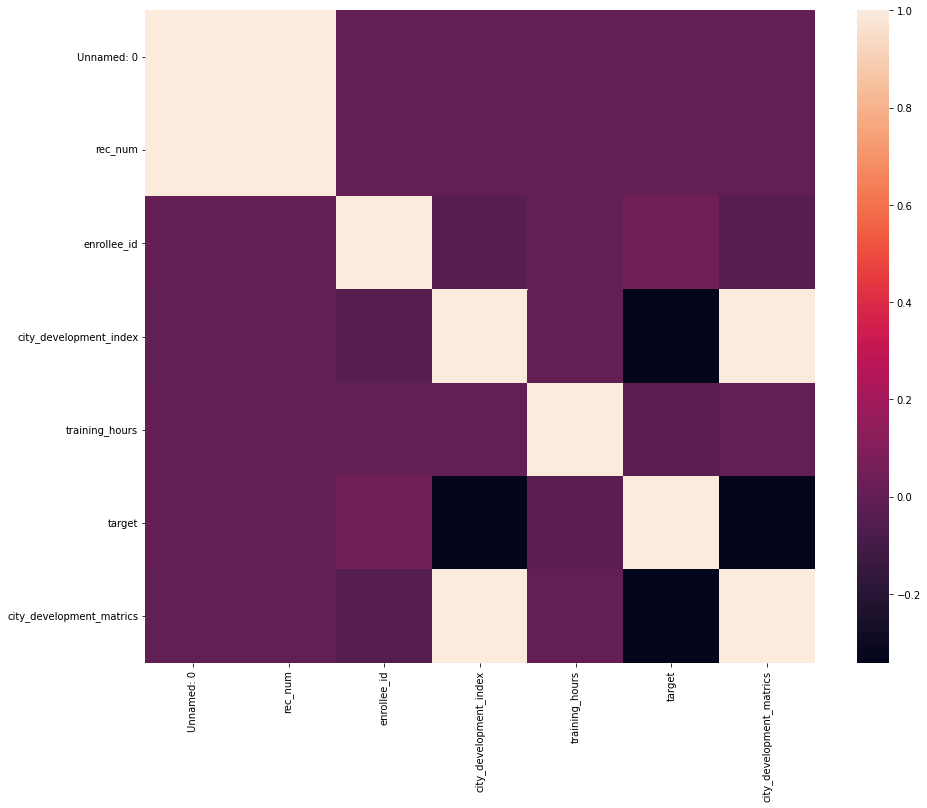

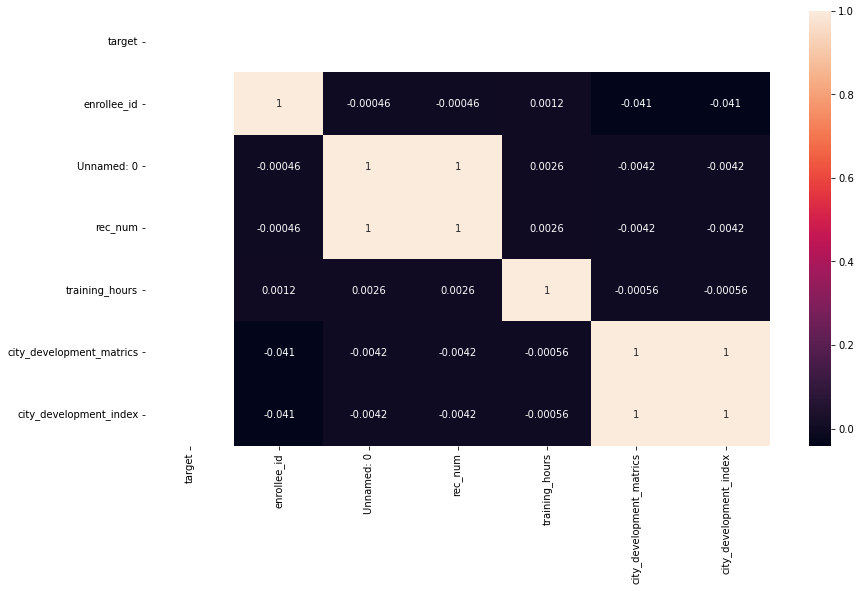

In [124]:
# For the numerical attributes, use heatmap to show the correlation, If you find any interesting short list of columns, create another heatmap with them and show the correlations inside the heaptmap as well
df = pd.read_csv('/content/drive/MyDrive/hrdata.csv')
num_features = df.select_dtypes(include = [np.number])
num_features.columns
correlation = num_features.corr()
print(correlation['target'].sort_values(ascending = False))

plt.figure(figsize = (15, 12))
sns.heatmap(correlation)

numColumns = 10
columns = correlation.nlargest(numColumns, 'target')['target'].index
print(columns)
c = np.corrcoef(df[columns].values.T)
plt.figure(figsize = (14, 8))
sns.heatmap(c, annot= True, xticklabels=columns.values, yticklabels = columns.values)

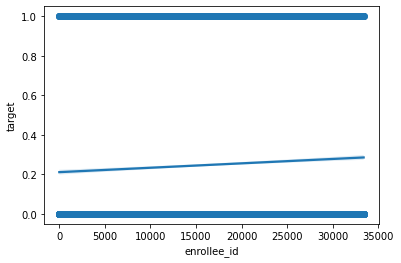

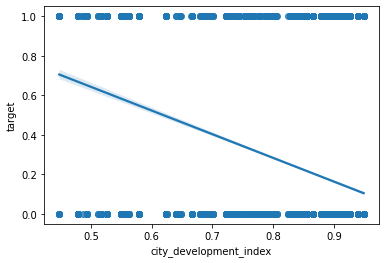

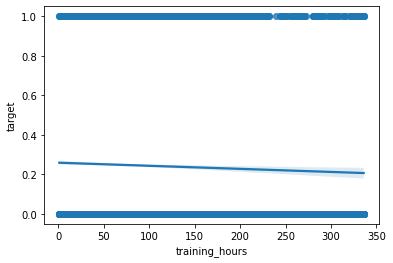

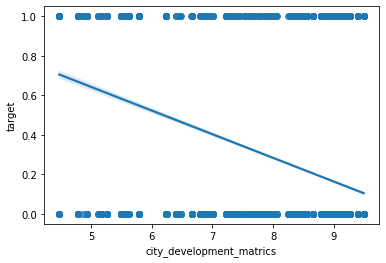

In [125]:
# Show scatter plots between columns to show the relationships with the target
sns.regplot(x='enrollee_id', y = 'target', data=df, scatter = True, fit_reg = True)
plt.show()
sns.regplot(x='city_development_index', y = 'target', data=df, scatter = True, fit_reg = True)
plt.show()
sns.regplot(x='training_hours', y = 'target', data=df, scatter = True, fit_reg = True)
plt.show()
sns.regplot(x='city_development_matrics', y = 'target', data=df, scatter = True, fit_reg = True)
plt.show()

After rendering the scatter plots, we can see that the binary value of the target column results in the dots to be spread across two horizontal lines. It would be better to visualize the relationships between the numeric columns and the target values with a count plot using target as a hue argument, as shown in a previous step.

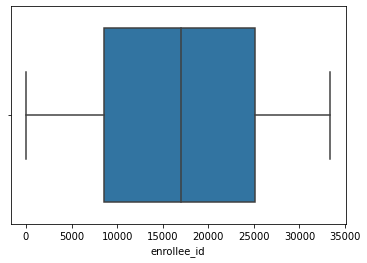

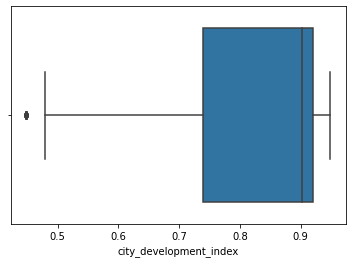

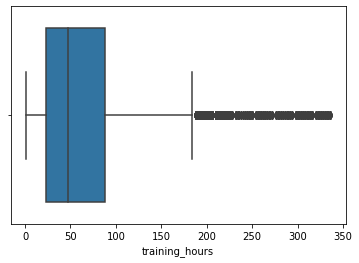

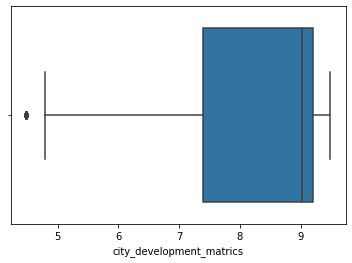

In [126]:
# Use boxplot or any other strategies to find outliers
sns.boxplot(x = df['enrollee_id'])
plt.show()
sns.boxplot(x = df['city_development_index'])
plt.show()
sns.boxplot(x = df['training_hours'])
plt.show()
sns.boxplot(x = df['city_development_matrics'])
plt.show()



12. The different values of experience range from <1 to >20 in terms of years. Since there are 22 possible values of this category, we can separate them by having them in bins having the first 8 values in 0, the second 7 values in 0, and the rest of the 7 values in 2. We probably should not do that, however, because the count for values >20 are significantly higher compared to the rest of the values, so putting them with other values in the same bin would not give good information.

13. After performing the EDA, we can see that we have some bad features to remove. The company_size, company_type, and gender features are all missing more than 20% of their values, so these should be removed before training. We can also consider adding a new feature that allows the model to ignore the previously mentioned features when it comes across a missing value. In addition, the city_development_index, city_development_matrics, and training_hours columns have outliers. We can evaluate whether these values are valid and important, to the model, and see whether we should remove them or not. For the training_hours column, it seems that there is a large amount of outliers. We can consider binning these values, or leaving them alone, since they seem to be valid.  Also, for the experience column, we can consider making it a numeric feature by assigning the <1 and >20 values to be more specific or at least numeric, so we can see how the length of one's experience correlates to the target.